# Task 1 - Data Collection

Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.

## A - NCDC Website scrap

Website - https://covid19.ncdc.gov.ng/ it contains data with the following:

• States Affected

• No. of Cases (Lab Confirmed)

• No. of Cases (on admission)

• No. Discharged

• No. of Deaths

In [2]:
# import libraries
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
#  Save the data to a DataFrame object

ncdc = pd.read_csv('ncdc.csv', index_col=False)

In [4]:
ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58713,1284,56990,439
1,FCT,19841,571,19104,166
2,Kaduna,9068,3,9000,65
3,Plateau,9060,1,9002,57
4,Rivers,7169,28,7040,101


## B - John Hopkins Data Repository
The Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) publishes daily data on confirmed, death and recovered cases across different countries.

Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis.

In [5]:
# loading the data from github
# confirmed cases
jhopkins_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col=False)

# recovered cases
jhopkins_recovered = pd.read_csv('time_series_covid19_recovered_global.csv', index_col=False)

# death cases
jhopkins_deaths = pd.read_csv('time_series_covid19_deaths_global.csv', index_col=False)

## C - External Data

External data gotten from other sources are imported as well to help our analysis

In [6]:
# loading external data 
real_gdp_data = pd.read_csv('RealGDP.csv', index_col=False)

covid_ng_data = pd.read_csv('covidnig.csv', index_col=False)

covid_external_data = pd.read_csv('covid_external.csv', index_col=False)

budget_data = pd.read_csv('Budget data.csv', index_col=False)

## Task 2 - View the data

Obtain basic information about the data using the head() and info() method.

In [7]:
ncdc

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58713,1284,56990,439
1,FCT,19841,571,19104,166
2,Kaduna,9068,3,9000,65
3,Plateau,9060,1,9002,57
4,Rivers,7169,28,7040,101
5,Oyo,6855,2,6729,124
6,Edo,4907,7,4715,185
7,Ogun,4680,3,4627,50
8,Kano,3967,8,3849,110
9,Ondo,3248,1105,2080,63


In [8]:
ncdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


### We can ascertain that there are no null values in the ncdc data which is extracted from the given source.

In [9]:
ncdc.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37.000000,37.000000,37.000000,37.000000
mean,4478.432432,195.243243,4227.351351,55.837838
std,9868.593276,439.491841,9615.019831,77.412859
min,5.000000,0.000000,3.000000,2.000000
25%,930.000000,3.000000,855.000000,17.000000
50%,1909.000000,12.000000,1744.000000,32.000000
75%,3248.000000,42.000000,3067.000000,57.000000
max,58713.000000,1997.000000,56990.000000,439.000000


In [10]:
ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58713,1284,56990,439
1,FCT,19841,571,19104,166
2,Kaduna,9068,3,9000,65
3,Plateau,9060,1,9002,57
4,Rivers,7169,28,7040,101


Text(0.5, 1.0, 'number of confirmed cases')

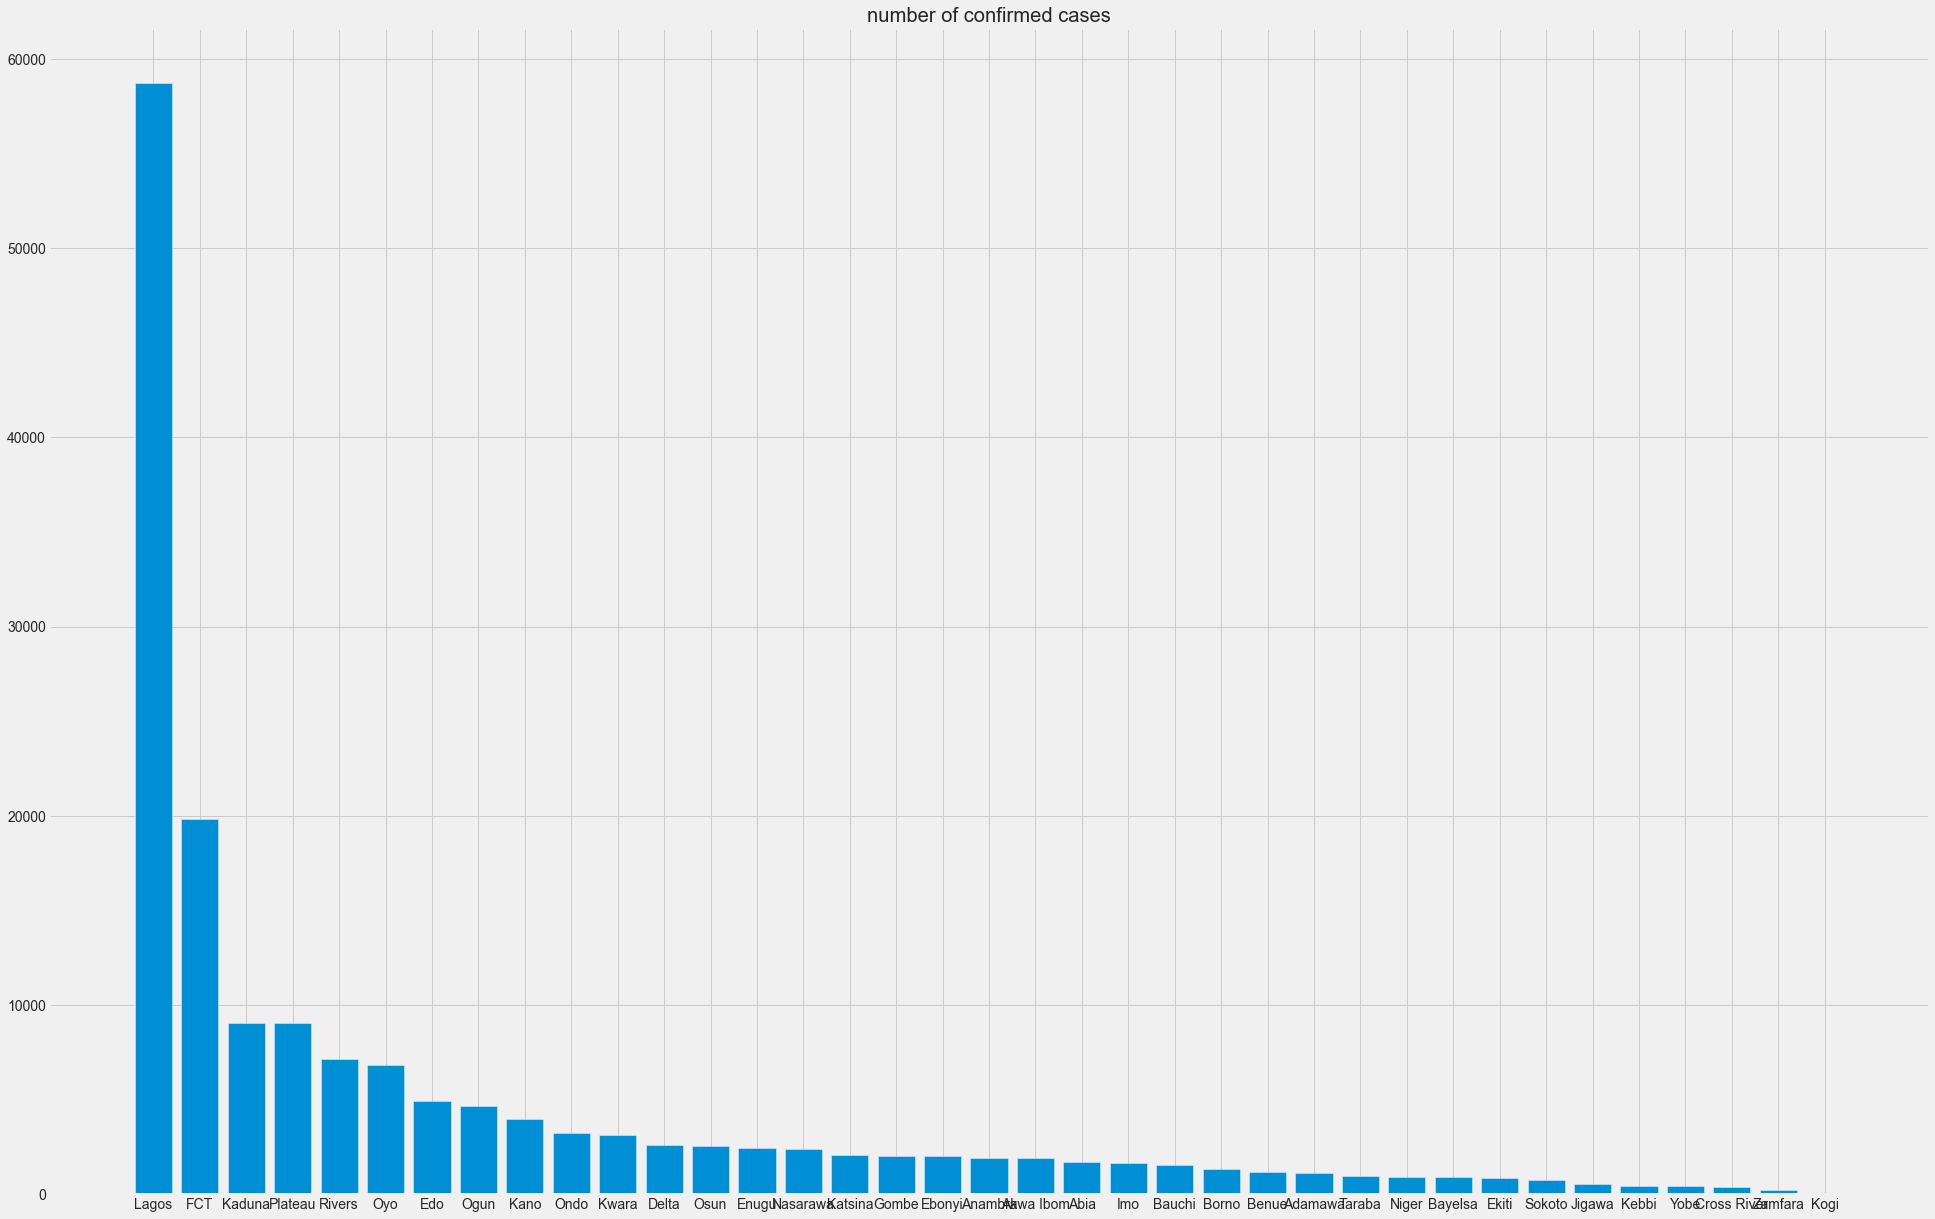

In [11]:
# Number of confirmed cases across each state

fig,ax=plt.subplots(figsize=(30,20))
ax.bar(ncdc['States Affected'],ncdc['No. of Cases (Lab Confirmed)'])
plt.title('number of confirmed cases')

### Lagos overall confirmed cases is very high compared to other state as at the time.

In [12]:
# using groupby method
ncdc_confirmed_cases = pd.DataFrame(ncdc.groupby('States Affected')['No. of Cases (Lab Confirmed)']
                         .agg('sum')).sort_values(by='No. of Cases (Lab Confirmed)', ascending=False,axis=0)

In [13]:
ncdc_confirmed_cases

,No. of Cases (Lab Confirmed)
States Affected,
Lagos,58713
FCT,19841
Kaduna,9068
Plateau,9060
Rivers,7169
Oyo,6855
Edo,4907
Ogun,4680
Kano,3967


#### The top 10 states with the highest number of confirmed cases are Lagos with 58713 cases, FCT with 19841 cases, Kaduna with 9068 cases, Plateau with 9060 cases, Rivers with 7169 cases, Oyo with 6855 cases, Edo with 4907 cases, Ogun with 4680 cases, Kano with 3967 cases, and Ondo with 3248 cases.

Text(0.5, 1.0, 'number of discharged cases')

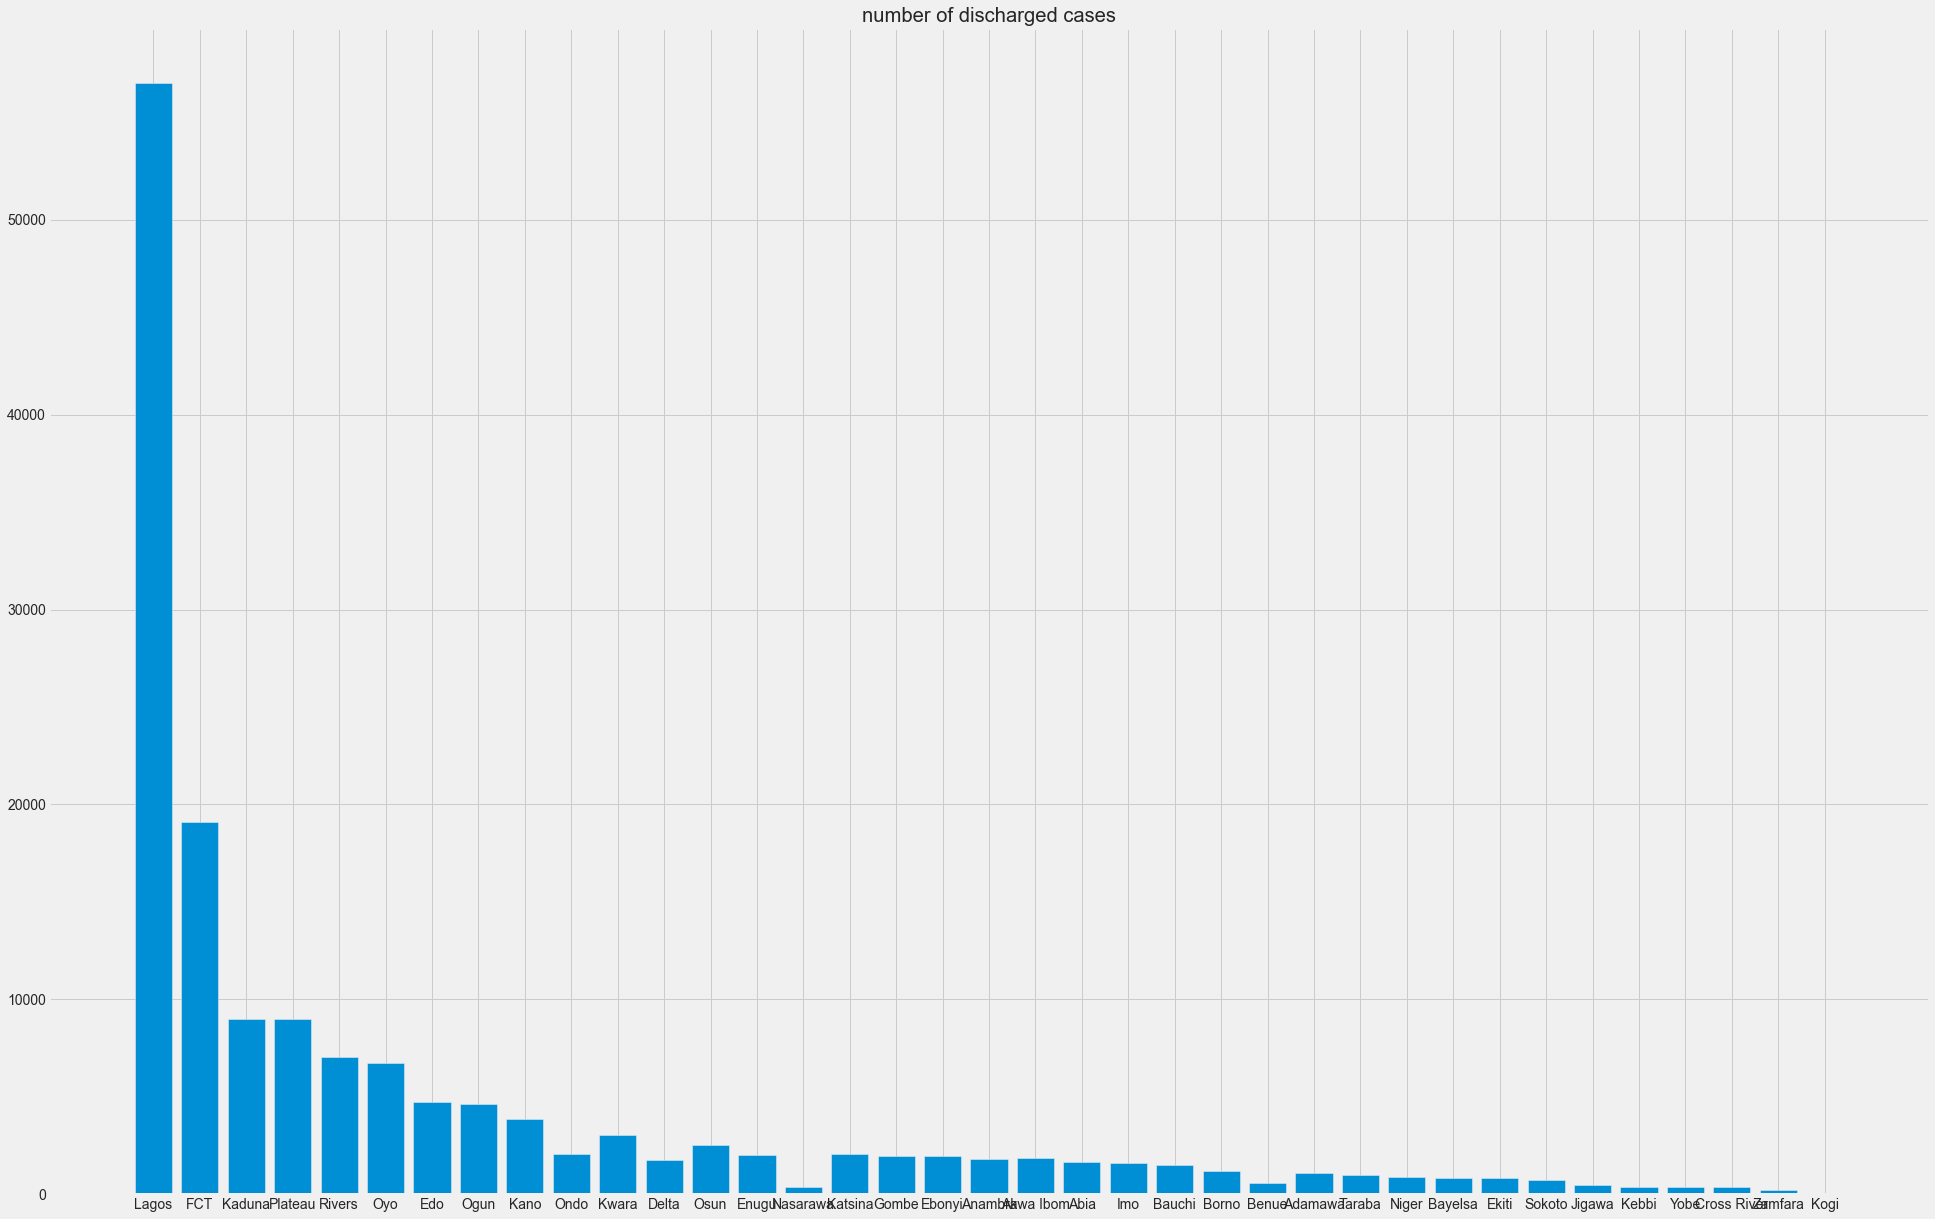

In [14]:
# Number of discharged cases across each state

fig,ax=plt.subplots(figsize=(30,20))
ax.bar(ncdc['States Affected'],ncdc['No. Discharged'])
plt.title('number of discharged cases')

### Lagos overall discharged cases is very high compared to other state as at the time.

In [15]:
# using groupby method
ncdc_discharged_cases = pd.DataFrame(ncdc.groupby('States Affected')['No. Discharged']
                         .agg('sum')).sort_values(by='No. Discharged', ascending=False,axis=0)

In [16]:
ncdc_discharged_cases

,No. Discharged
States Affected,
Lagos,56990
FCT,19104
Plateau,9002
Kaduna,9000
Rivers,7040
Oyo,6729
Edo,4715
Ogun,4627
Kano,3849


#### The top 10 states with the highest number of discharged cases are Lagos with 56990 cases, FCT with 19104 cases, Plateau with 9002 cases, Kaduna with 9000 cases,  Rivers with 7040 cases, Oyo with 6729cases, Edo with 4715 cases, Ogun with 4627 cases, Kano with 3849 cases, and Kwara with 3067 cases.

Text(0.5, 1.0, 'number of death cases')

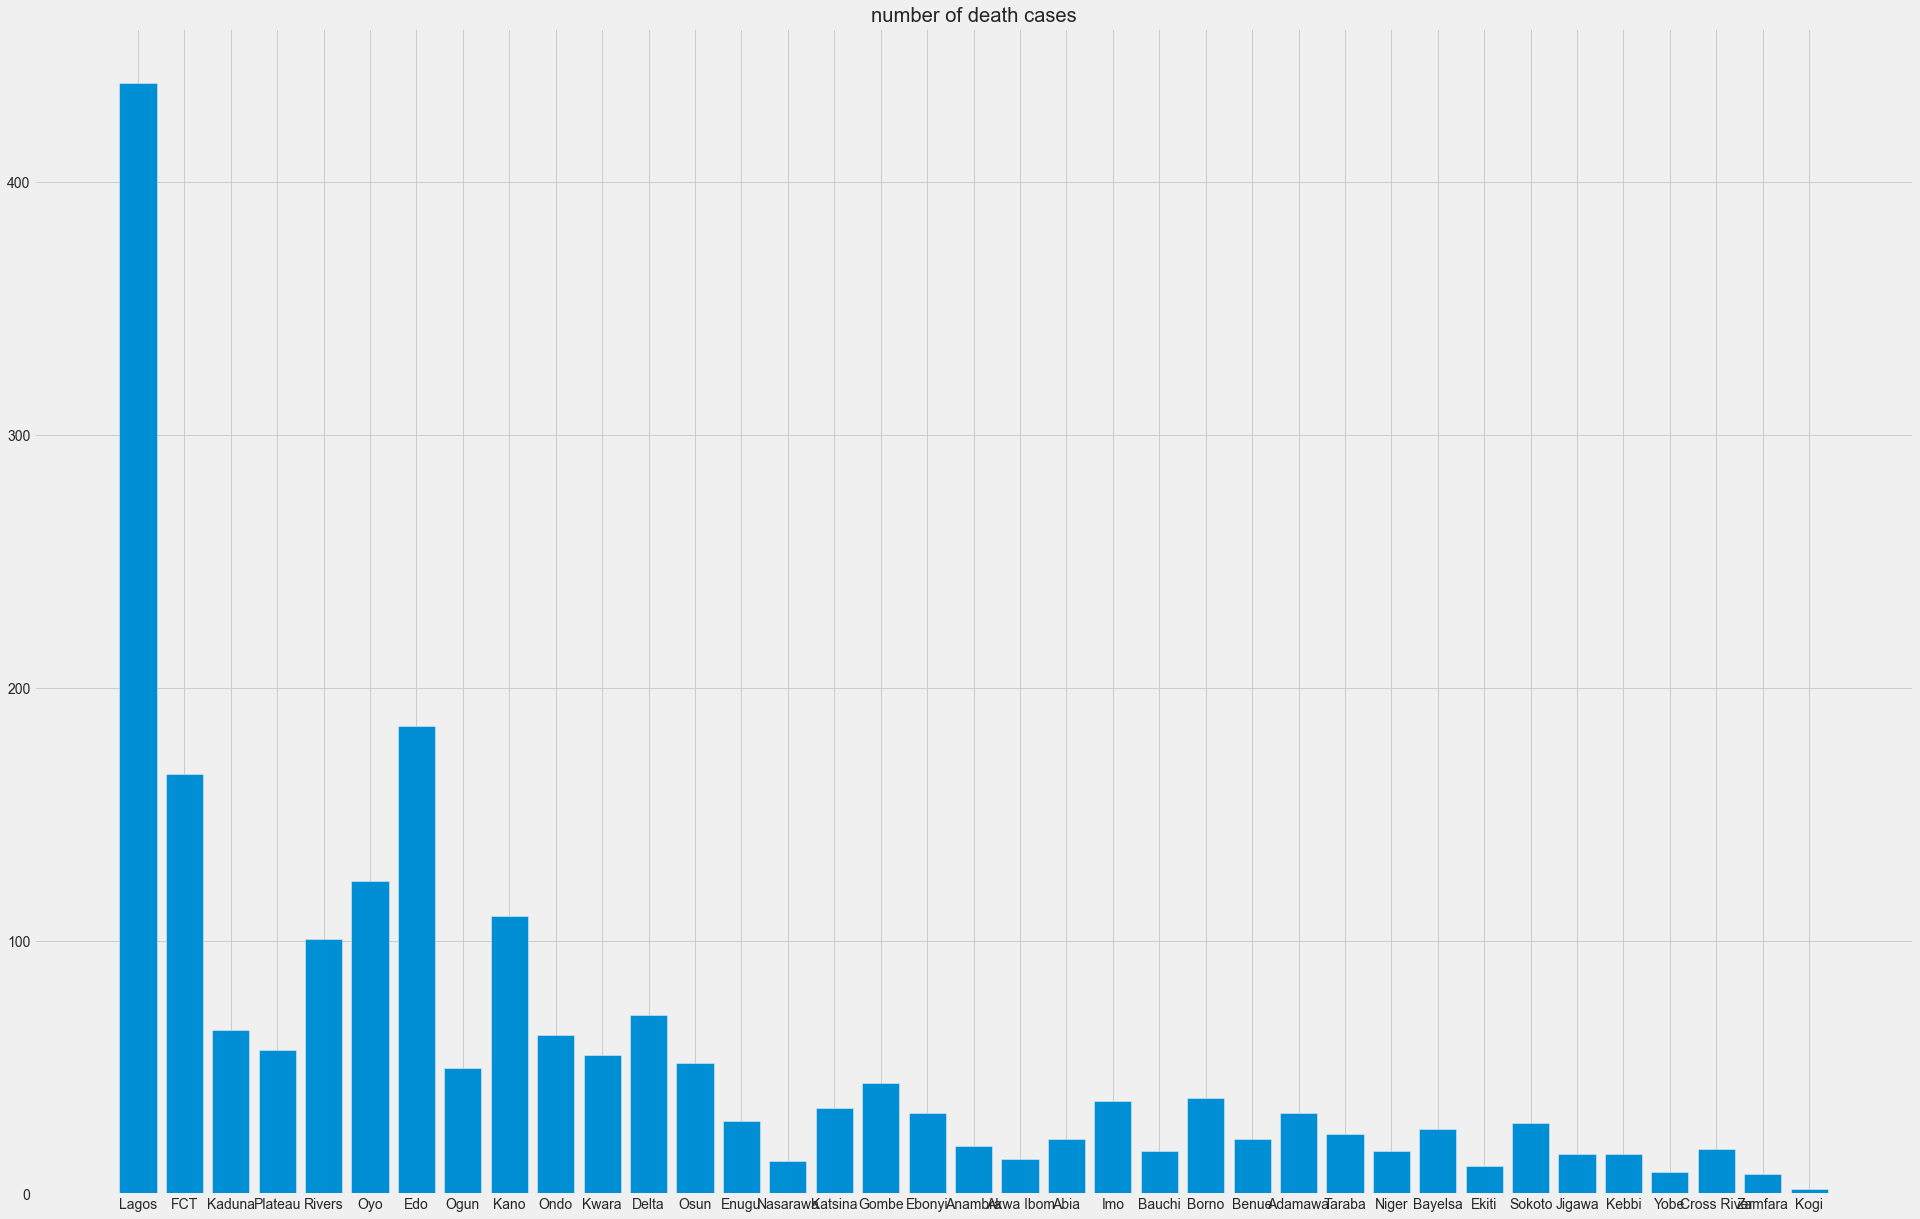

In [17]:
# Number of death cases across each state

fig,ax=plt.subplots(figsize=(30,20))
ax.bar(ncdc['States Affected'],ncdc['No. of Deaths'])
plt.title('number of death cases')

In [18]:
# using groupby method
ncdc_death_cases = pd.DataFrame(ncdc.groupby('States Affected')['No. of Deaths']
                         .agg('sum')).sort_values(by='No. of Deaths', ascending=False,axis=0)

In [19]:
ncdc_death_cases

,No. of Deaths
States Affected,
Lagos,439
Edo,185
FCT,166
Oyo,124
Kano,110
Rivers,101
Delta,71
Kaduna,65
Ondo,63


#### The top 10 states with the highest number of death cases are Lagos with 439 cases, Edo with 185 cases, FCT with 166 cases,  Oyo with 124 cases, Kano with 110 cases, Rivers with 101 cases, Delta with 71 cases, Kaduna with 65 cases, Ondo with 63 cases, and Plateau with 57 cases.

## Visualization Analysis

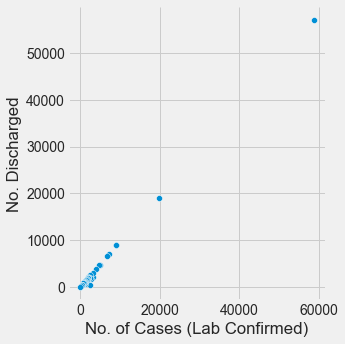

In [20]:
sns.relplot(data = ncdc, x = 'No. of Cases (Lab Confirmed)', y = 'No. Discharged' )

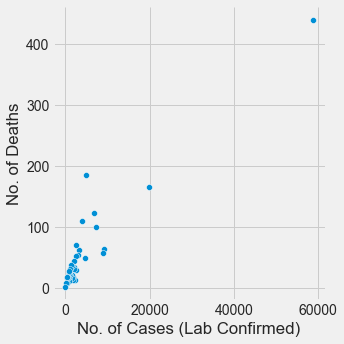

In [21]:
sns.relplot(data = ncdc, x ='No. of Cases (Lab Confirmed)', y = 'No. of Deaths')

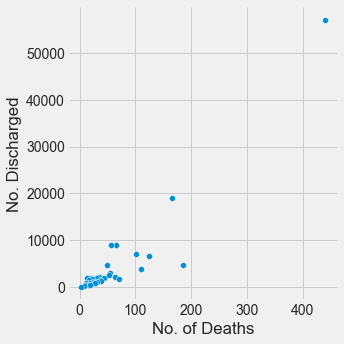

In [22]:
sns.relplot(data = ncdc, x ='No. of Deaths', y = 'No. Discharged')

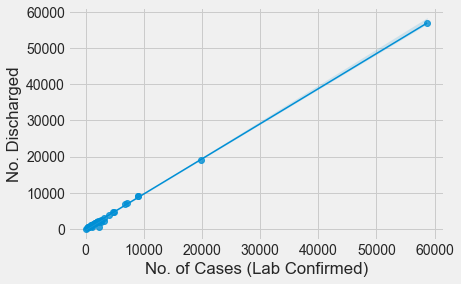

In [23]:
p=sns.regplot(data=ncdc, x='No. of Cases (Lab Confirmed)', y='No. Discharged')
plt.setp(p.lines, linewidth=1.5) 
plt.show()

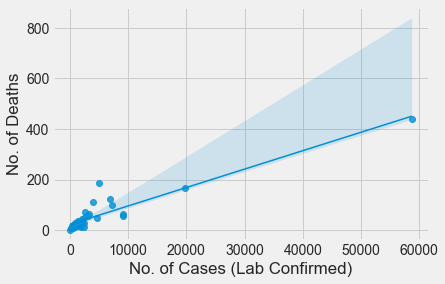

In [24]:
p=sns.regplot(data=ncdc, x='No. of Cases (Lab Confirmed)', y='No. of Deaths')
plt.setp(p.lines, linewidth=1.5) 
plt.show()

<AxesSubplot:>

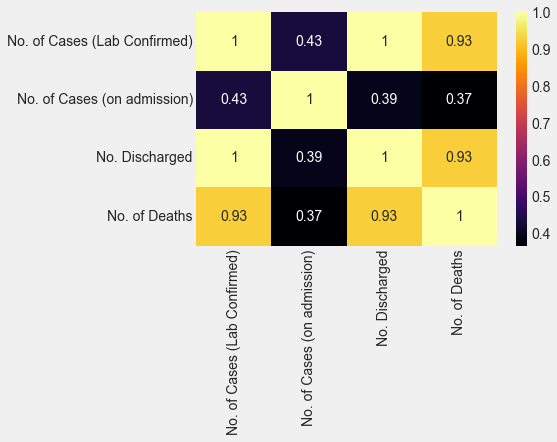

In [25]:
sns.heatmap(ncdc.corr(), annot = True, cmap = 'inferno')

#### This shows that there is high correlation between the Confirmed cases, Discharged cases and the Death cases

<AxesSubplot:xlabel='No. of Deaths', ylabel='No. Discharged'>

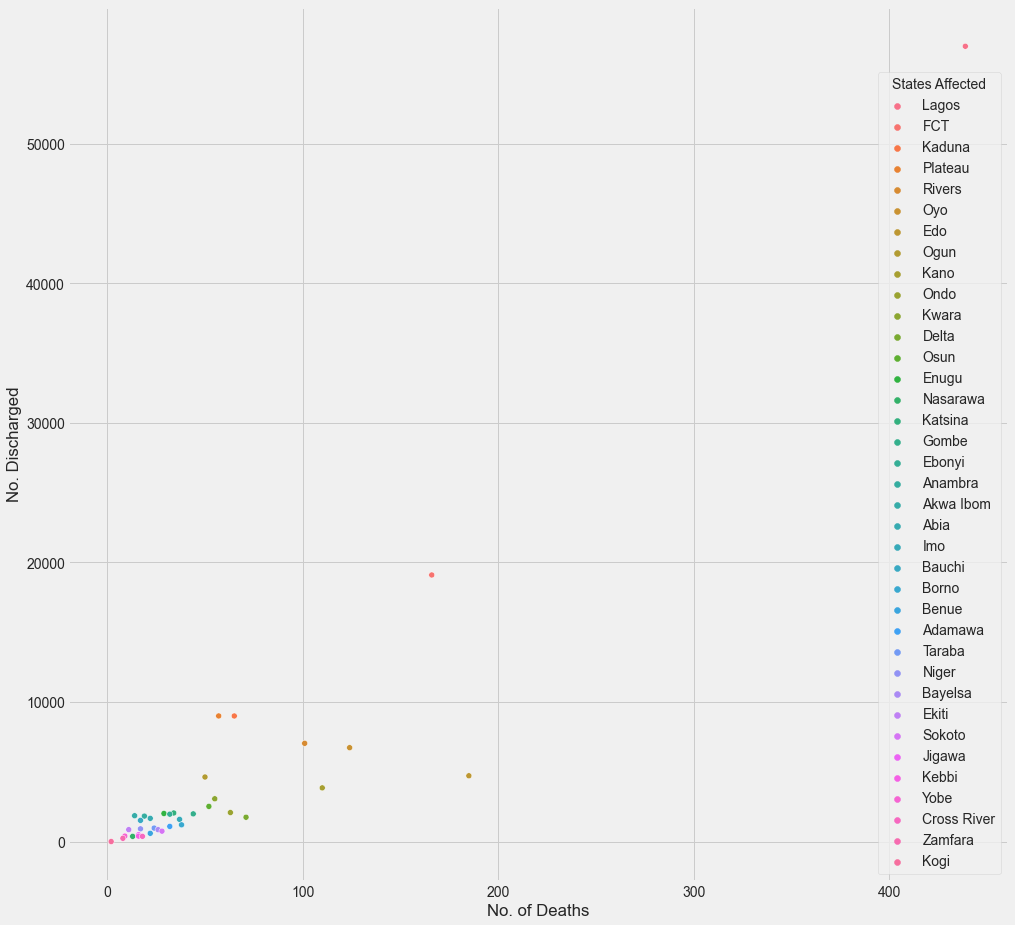

In [26]:
# showing the correlation between the No of Deaths and No. Discharged within the states using scatter plot method

fig,ax=plt.subplots(figsize=(15,15))
sns.scatterplot(data=ncdc, x ='No. of Deaths', y ='No. Discharged', hue= 'States Affected',ax=ax)

<AxesSubplot:xlabel='No. of Cases (Lab Confirmed)', ylabel='No. Discharged'>

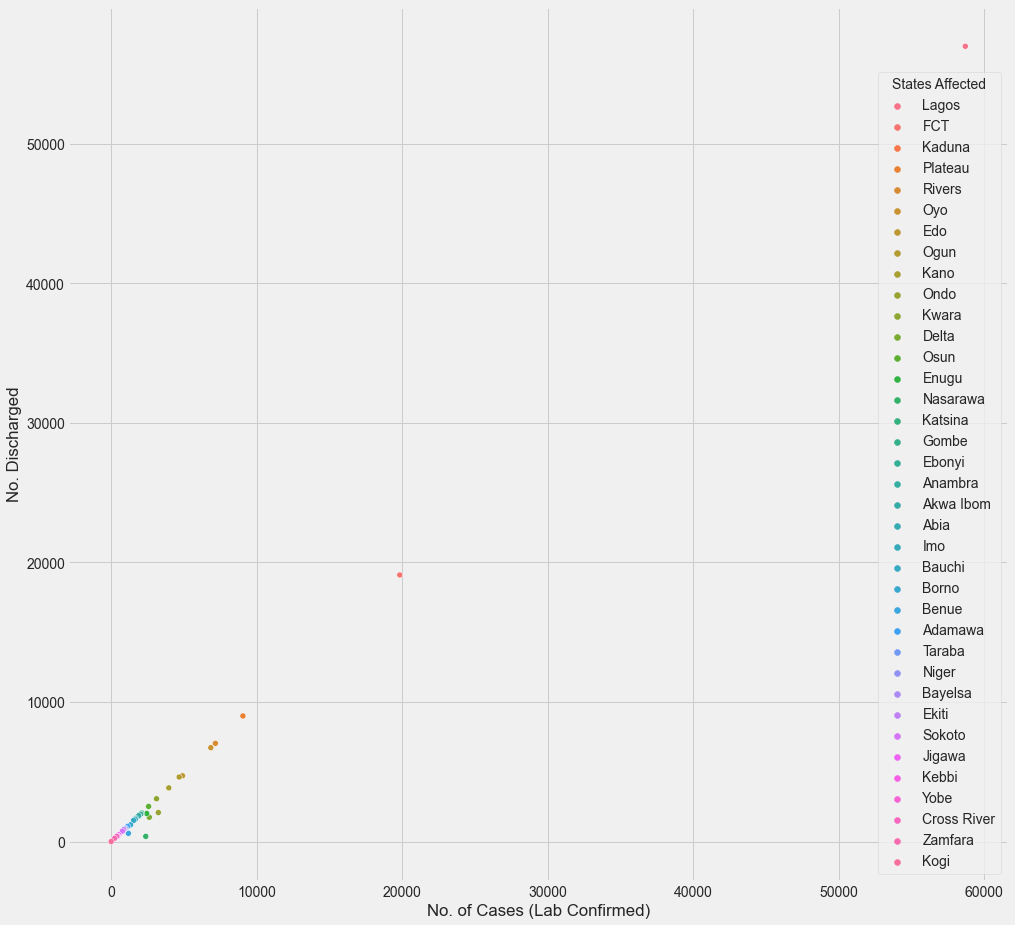

In [27]:
fig,ax=plt.subplots(figsize=(15,15))
sns.scatterplot(data=ncdc, x='No. of Cases (Lab Confirmed)', y='No. Discharged', hue='States Affected',ax=ax)

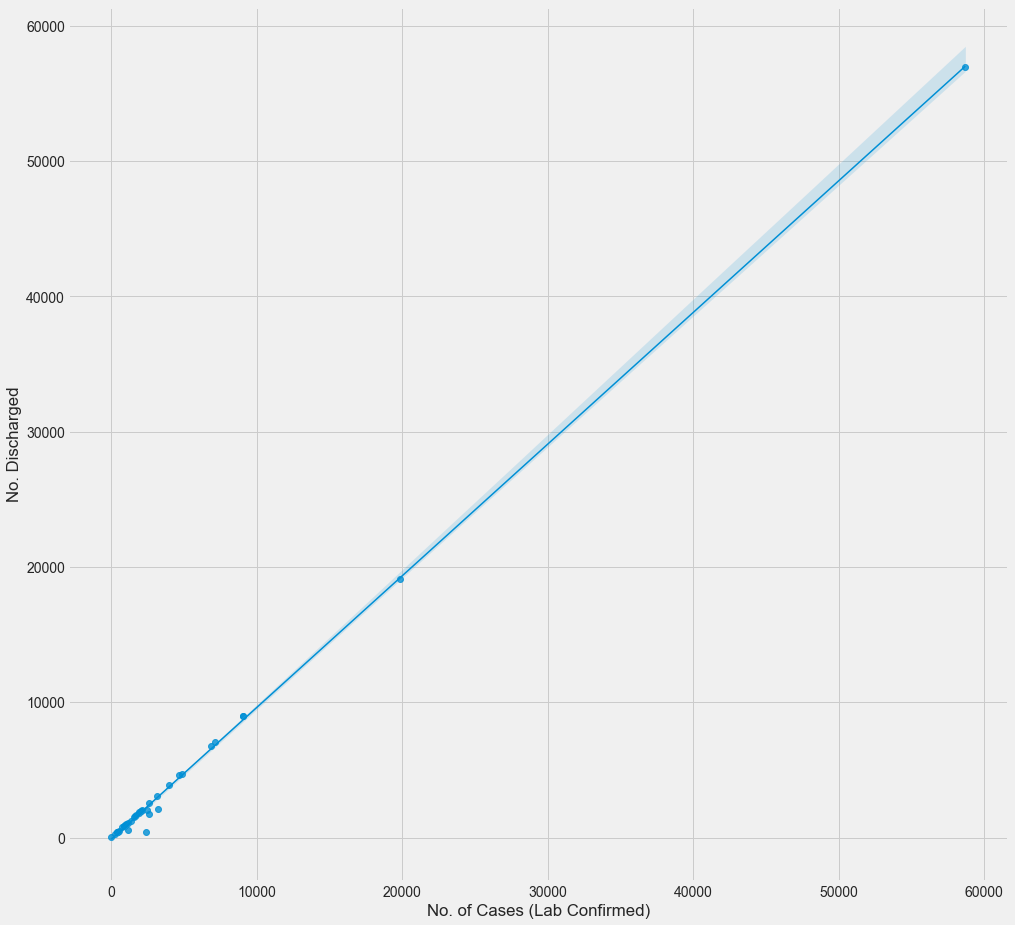

In [28]:
# showing the correlation between the No of Deaths and No. Discharged within the states using regression plot method

fig,ax=plt.subplots(figsize=(15,15))
p=sns.regplot(data=ncdc, x='No. of Cases (Lab Confirmed)', y='No. Discharged')
plt.setp(p.lines,linewidth=1.5) 
plt.show()

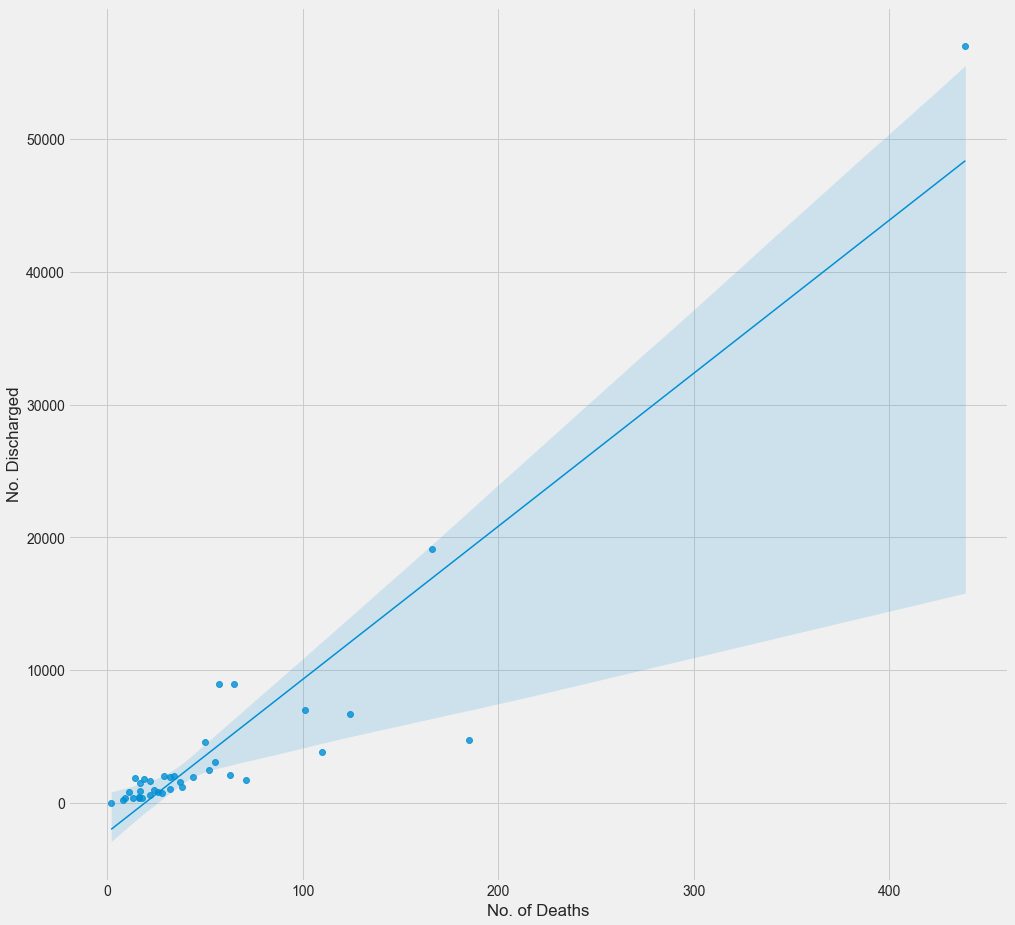

In [29]:
fig,ax=plt.subplots(figsize=(15,15))
p=sns.regplot(data=ncdc, x='No. of Deaths', y='No. Discharged')
plt.setp(p.lines,linewidth=1.5) 
plt.show()

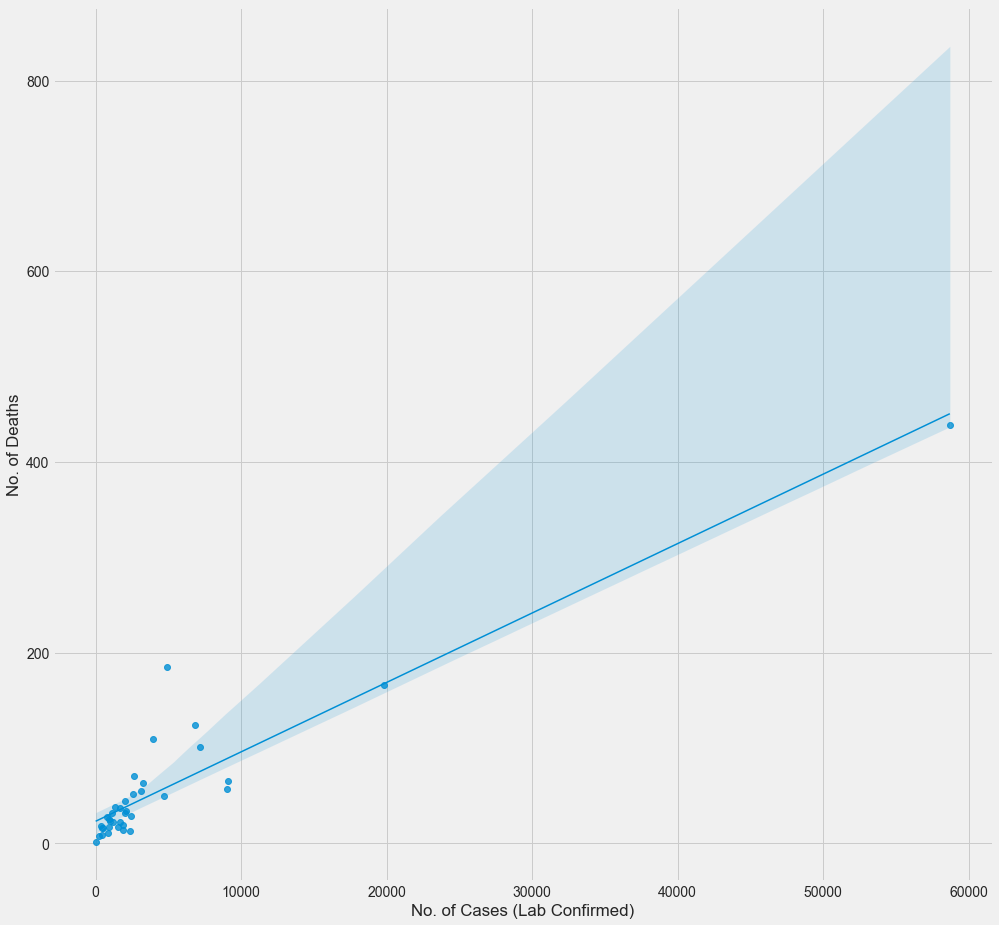

In [30]:
fig,ax=plt.subplots(figsize=(15,15))
p=sns.regplot(data=ncdc, x='No. of Cases (Lab Confirmed)', y='No. of Deaths')
plt.setp(p.lines,linewidth=1.5) 
plt.show()

<AxesSubplot:xlabel='No. of Cases (Lab Confirmed)', ylabel='Count'>

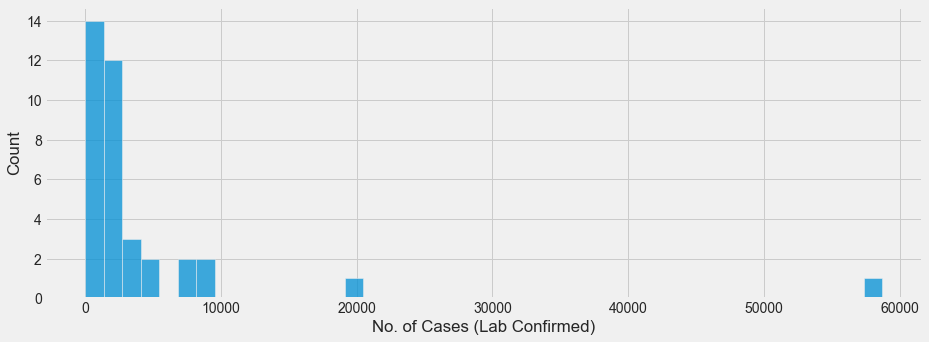

In [31]:
fig,ax=plt.subplots(figsize=(14,5))
sns.histplot(ncdc['No. of Cases (Lab Confirmed)'])

<AxesSubplot:xlabel='No. Discharged', ylabel='Count'>

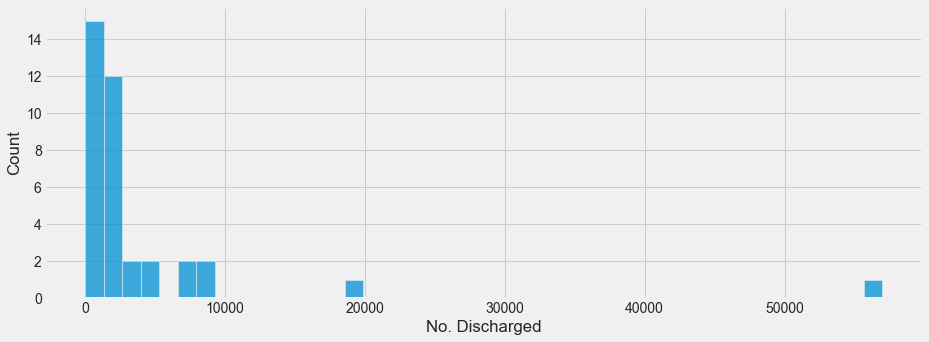

In [32]:
fig,ax=plt.subplots(figsize=(14,5))
sns.histplot(ncdc['No. Discharged'])

<AxesSubplot:xlabel='No. of Deaths', ylabel='Count'>

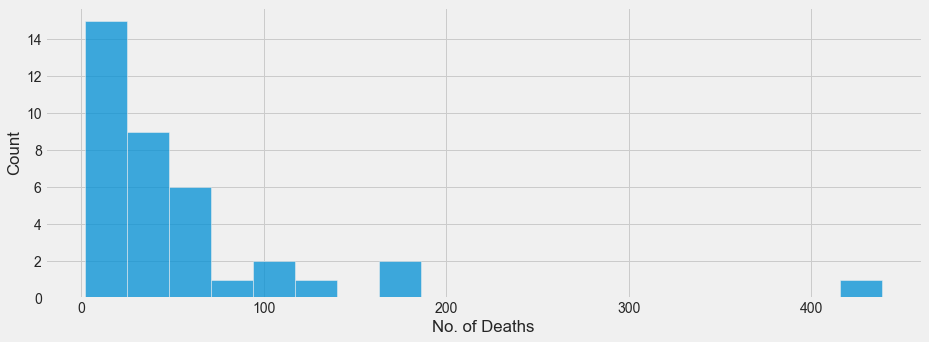

In [33]:
fig,ax=plt.subplots(figsize=(14,5))
sns.histplot(ncdc['No. of Deaths'])

## John Hopkins Data

In [34]:
jhopkins_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209036,209056,209072,209083,209084,209107,209153,209181,209181,209215
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334264,334264,334273,334291,334305,334314,334315,334336,334336,334345
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271409,271421,271424,271424,271425,271425,271426,271428,271431,271432
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47860,47860,47866,47866,47866,47866,47866,47866,47866,47866
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105184,105184,105184,105184,105184,105184,105184,105184,105205,105205


In [35]:
jhopkins_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
jhopkins_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


In [37]:
# Most of the Province/State feature enteries are null, not important and will be dropped for our annalysis, since we need only country (Nigeria)
jhopkins_confirmed.drop('Province/State',axis=1,inplace=True)
jhopkins_recovered.drop('Province/State',axis=1,inplace=True)
jhopkins_deaths.drop('Province/State',axis=1,inplace=True)


In [38]:
jhopkins_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209036,209056,209072,209083,209084,209107,209153,209181,209181,209215
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334264,334264,334273,334291,334305,334314,334315,334336,334336,334345
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271409,271421,271424,271424,271425,271425,271426,271428,271431,271432
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47860,47860,47866,47866,47866,47866,47866,47866,47866,47866
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105184,105184,105184,105184,105184,105184,105184,105184,105205,105205


In [39]:
jhopkins_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
jhopkins_deaths.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/14/23,2/15/23,2/16/23,2/17/23,2/18/23,2/19/23,2/20/23,2/21/23,2/22/23,2/23/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3598,3598
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


In [41]:
# Using the .melt method 
dates = jhopkins_confirmed.columns[4:]
jh1 = jhopkins_confirmed.melt(id_vars=['Country/Region','Lat','Long'], value_vars=dates,var_name='Date',value_name='Confirmed')

jh2 = jhopkins_recovered.melt(id_vars=['Country/Region','Lat','Long'],value_vars=dates,var_name='Date',value_name='Recovered')

jh3 = jhopkins_deaths.melt(id_vars=['Country/Region','Lat','Long'],value_vars=dates,var_name='Date',value_name='Deaths')

### To Extract Nigerians Data from John Hopkins Data;

In [42]:
jh1.head()

,Country/Region,Lat,Long,Date,Confirmed
0,Afghanistan,33.93911,67.709953,1/23/20,0
1,Albania,41.15330,20.168300,1/23/20,0
2,Algeria,28.03390,1.659600,1/23/20,0
3,Andorra,42.50630,1.521800,1/23/20,0
4,Angola,-11.20270,17.873900,1/23/20,0


In [43]:
jh2.head()

,Country/Region,Lat,Long,Date,Recovered
0,Afghanistan,33.93911,67.709953,1/23/20,0
1,Albania,41.15330,20.168300,1/23/20,0
2,Algeria,28.03390,1.659600,1/23/20,0
3,Andorra,42.50630,1.521800,1/23/20,0
4,Angola,-11.20270,17.873900,1/23/20,0


In [44]:
jh3.head()

,Country/Region,Lat,Long,Date,Deaths
0,Afghanistan,33.93911,67.709953,1/23/20,0
1,Albania,41.15330,20.168300,1/23/20,0
2,Algeria,28.03390,1.659600,1/23/20,0
3,Andorra,42.50630,1.521800,1/23/20,0
4,Angola,-11.20270,17.873900,1/23/20,0


In [45]:
# Merging the data
df1 = pd.merge(jh1,jh2, how='left', on=['Country/Region','Lat','Long','Date'])
full_data = pd.merge(df1,jh3, how='left', on=['Country/Region','Lat','Long','Date'])

In [46]:
jh1.shape

(325992, 5)

In [47]:
jh2.shape

(309072, 5)

In [48]:
jh3.shape

(325992, 5)

In [49]:
#  TO convert to standard time feature

full_data['Date'] = pd.to_datetime(full_data['Date'])

In [50]:
full_data.head()

,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,Afghanistan,33.93911,67.709953,2020-01-23,0,0.0,0
1,Albania,41.15330,20.168300,2020-01-23,0,0.0,0
2,Algeria,28.03390,1.659600,2020-01-23,0,0.0,0
3,Andorra,42.50630,1.521800,2020-01-23,0,0.0,0
4,Angola,-11.20270,17.873900,2020-01-23,0,0.0,0


In [51]:
# Using the .info method
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328248 entries, 0 to 328247
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country/Region  328248 non-null  object        
 1   Lat             325992 non-null  float64       
 2   Long            325992 non-null  float64       
 3   Date            328248 non-null  datetime64[ns]
 4   Confirmed       328248 non-null  int64         
 5   Recovered       303432 non-null  float64       
 6   Deaths          328248 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.0+ MB


### We can ascertain that there are no null values in the John Hopkins data which is extracted from the given source.

In [52]:
# using .describe method
full_data.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,325992.000000,325992.000000,3.282480e+05,3.034320e+05,3.282480e+05
mean,19.582257,22.028574,9.366400e+05,7.648886e+04,1.317160e+04
std,25.873266,77.487645,4.787421e+06,7.144927e+05,6.325040e+04
min,-71.949900,-178.116500,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.919300,-23.041800,6.030000e+02,0.000000e+00,3.000000e+00
50%,21.007900,20.902977,1.350100e+04,0.000000e+00,1.410000e+02
75%,40.339900,88.092400,2.205622e+05,9.540000e+02,2.962000e+03
max,71.706900,178.065000,1.033558e+08,3.097475e+07,1.119508e+06


In [53]:
full_data.isnull().sum()

Country/Region        0
Lat                2256
Long               2256
Date                  0
Confirmed             0
Recovered         24816
Deaths                0
dtype: int64

In [54]:
#  Creating the 'Active Cases' column
full_data['Active Cases'] = full_data['Confirmed'] - full_data['Recovered'] - full_data['Deaths']

In [55]:
full_data.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
0,Afghanistan,33.93911,67.709953,2020-01-23,0,0.0,0,0.0
1,Albania,41.15330,20.168300,2020-01-23,0,0.0,0,0.0
2,Algeria,28.03390,1.659600,2020-01-23,0,0.0,0,0.0
3,Andorra,42.50630,1.521800,2020-01-23,0,0.0,0,0.0
4,Angola,-11.20270,17.873900,2020-01-23,0,0.0,0,0.0
5,Antarctica,-71.94990,23.347000,2020-01-23,0,0.0,0,0.0
6,Antigua and Barbuda,17.06080,-61.796400,2020-01-23,0,0.0,0,0.0
7,Argentina,-38.41610,-63.616700,2020-01-23,0,0.0,0,0.0
8,Armenia,40.06910,45.038200,2020-01-23,0,0.0,0,0.0
9,Australia,-35.47350,149.012400,2020-01-23,0,0.0,0,0.0


In [56]:
full_data.tail(10)

,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
328238,Uruguay,-32.522800,-55.765800,2023-02-23,1034046,0.0,7617,1026429.0
328239,Uzbekistan,41.377491,64.585262,2023-02-23,250932,0.0,1637,249295.0
328240,Vanuatu,-15.376700,166.959200,2023-02-23,12014,0.0,14,12000.0
328241,Venezuela,6.423800,-66.589700,2023-02-23,551954,0.0,5852,546102.0
328242,Vietnam,14.058324,108.277199,2023-02-23,11526870,0.0,43186,11483684.0
328243,West Bank and Gaza,31.952200,35.233200,2023-02-23,703228,0.0,5708,697520.0
328244,Winter Olympics 2022,39.904200,116.407400,2023-02-23,535,0.0,0,535.0
328245,Yemen,15.552727,48.516388,2023-02-23,11945,0.0,2159,9786.0
328246,Zambia,-13.133897,27.849332,2023-02-23,342831,0.0,4055,338776.0
328247,Zimbabwe,-19.015438,29.154857,2023-02-23,263921,0.0,5663,258258.0


#### To Extract Nigeria cases:

In [57]:
df_full_data = full_data.set_index(['Country/Region'])

In [58]:
nigeria = df_full_data.loc['Nigeria']

In [59]:
nigeria.shape

(1128, 7)

In [60]:
nigeria.head(20)

,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
Country/Region,,,,,,,
Nigeria,9.082,8.6753,2020-01-23,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-24,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-25,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-26,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-27,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-28,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-29,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-30,0,0.0,0,0.0
Nigeria,9.082,8.6753,2020-01-31,0,0.0,0,0.0


In [61]:
nigeria.tail(20)

,Lat,Long,Date,Confirmed,Recovered,Deaths,Active Cases
Country/Region,,,,,,,
Nigeria,9.082,8.6753,2023-02-04,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-05,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-06,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-07,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-08,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-09,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-10,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-11,266463,0.0,3155,263308.0
Nigeria,9.082,8.6753,2023-02-12,266463,0.0,3155,263308.0


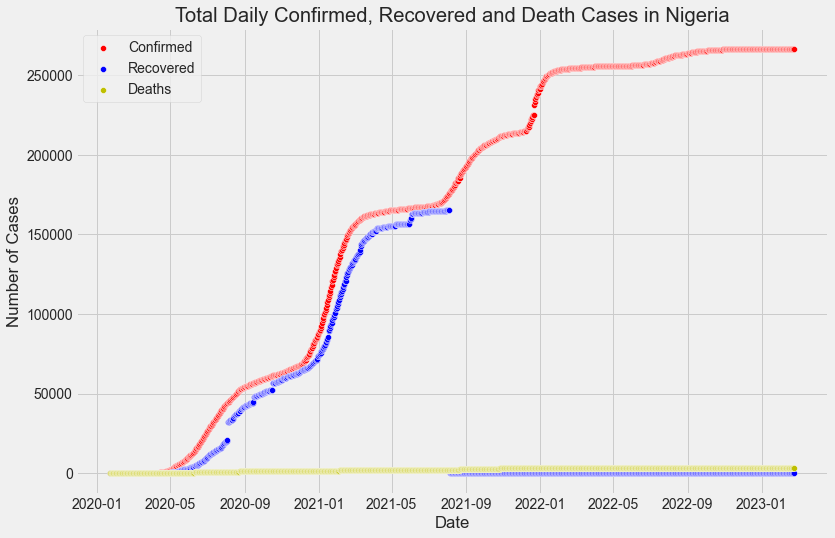

In [62]:
fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x='Date',y='Confirmed',data=nigeria,ax=ax,label='Confirmed',color='r')
sns.scatterplot(x='Date',y='Recovered',data=nigeria,ax=ax,label='Recovered',color='b')
sns.scatterplot(x='Date',y='Deaths',data=nigeria,ax=ax,label='Deaths',color='y')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')

ax.set_title('Total Daily Confirmed, Recovered and Death Cases in Nigeria')

plt.legend()

plt.show()

#### It can be deduced that some percentage of individuals who tested positive are recuperating.

### For Infection Rate;

In [63]:
nigeria['Infection Rate']= nigeria['Confirmed'].diff()

In [64]:
infection_rate = nigeria[['Date','Infection Rate']]

In [65]:
infection_rate

,Date,Infection Rate
Country/Region,,
Nigeria,2020-01-23,NaN
Nigeria,2020-01-24,0.0
Nigeria,2020-01-25,0.0
Nigeria,2020-01-26,0.0
Nigeria,2020-01-27,0.0
...,...,...
Nigeria,2023-02-19,0.0
Nigeria,2023-02-20,0.0
Nigeria,2023-02-21,0.0


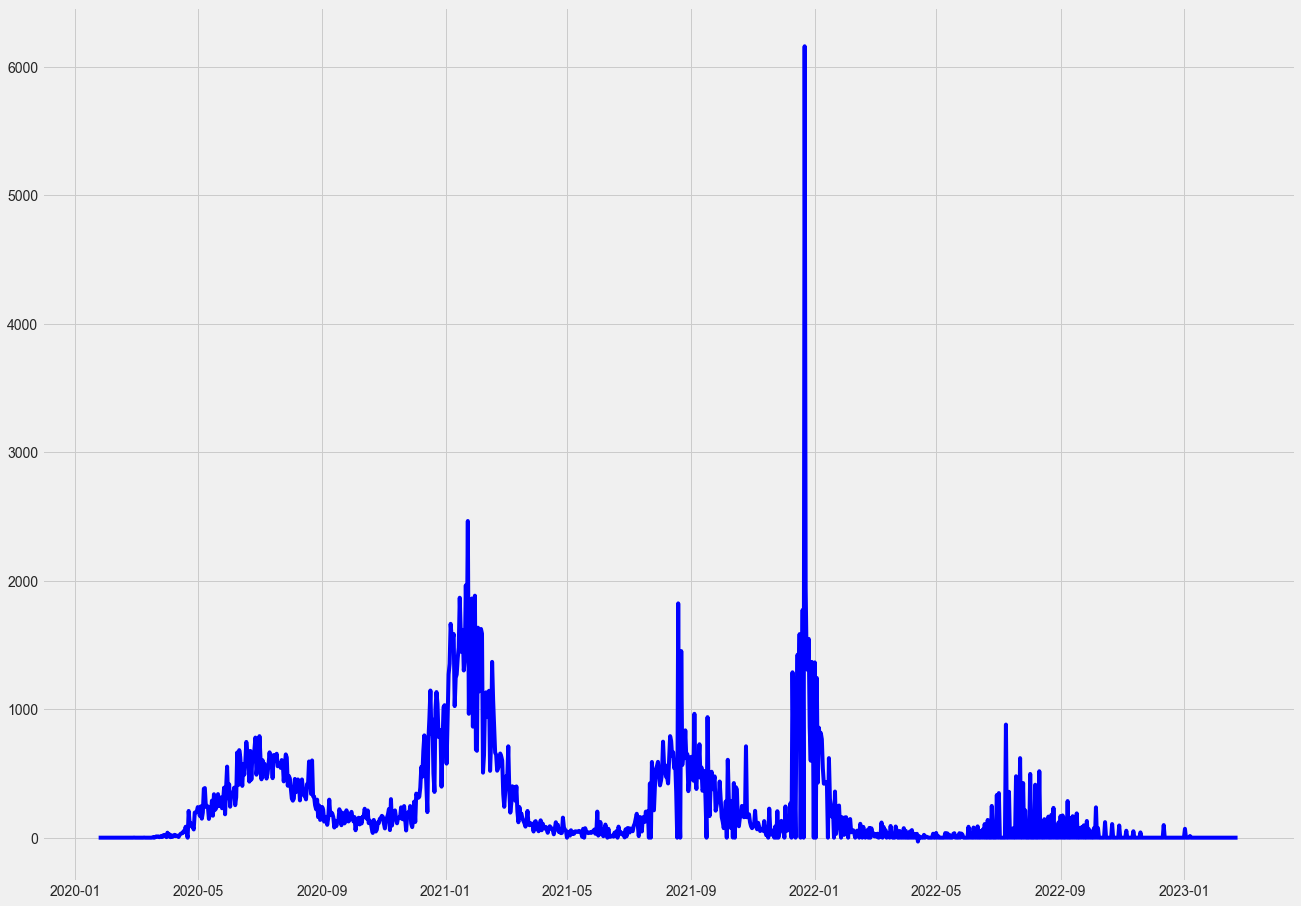

In [66]:
fig,ax=plt.subplots(figsize=(20,15))
plt.plot(nigeria['Date'],nigeria['Infection Rate'],c='b')

### There was a huge spike in the infection rate from around September 2021 to January 2022 after which the number of cases have been consolidating

In [67]:
nigeria['Infection Rate'].max()

6158.0

#### The Maximum infection increment is 6158. 

In [68]:
nigeria[nigeria['Infection Rate']==nigeria['Infection Rate'].max()]['Date']

Country/Region
Nigeria   2021-12-22
Name: Date, dtype: datetime64[ns]

#### The date with the maximum infection rate was on the 22nd of December 2021 with an infection rate of 6158.


#### Covid External Data (Index Data)

In [69]:
covid_external_data

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [70]:
ncdc

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58713,1284,56990,439
1,FCT,19841,571,19104,166
2,Kaduna,9068,3,9000,65
3,Plateau,9060,1,9002,57
4,Rivers,7169,28,7040,101
5,Oyo,6855,2,6729,124
6,Edo,4907,7,4715,185
7,Ogun,4680,3,4627,50
8,Kano,3967,8,3849,110
9,Ondo,3248,1105,2080,63


In [71]:
covid_external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   states                  37 non-null     object 
 1   region                  37 non-null     object 
 2   Population              37 non-null     int64  
 3   Overall CCVI Index      37 non-null     float64
 4   Age                     37 non-null     float64
 5   Epidemiological         37 non-null     float64
 6   Fragility               37 non-null     float64
 7   Health System           37 non-null     float64
 8   Population Density      37 non-null     float64
 9   Socio-Economic          37 non-null     float64
 10  Transport Availability  37 non-null     float64
 11  Acute IHR               37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [72]:
covid_external_data.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [73]:
covid_external_data.isnull().sum()

states                    0
region                    0
Population                0
Overall CCVI Index        0
Age                       0
Epidemiological           0
Fragility                 0
Health System             0
Population Density        0
Socio-Economic            0
Transport Availability    0
Acute IHR                 0
dtype: int64

In [74]:
covid_external_data.groupby('region')[covid_external_data.columns].agg('mean').sort_values(by='Overall CCVI Index')

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
region,,,,,,,,,,
South West,7.106167e+06,0.150000,0.616667,0.616667,0.333333,0.333333,0.733333,0.133333,0.300000,1.031667
North Central,4.792000e+06,0.328571,0.314286,0.485714,0.542857,0.414286,0.342857,0.528571,0.514286,0.874286
South South,4.806833e+06,0.416667,0.700000,0.616667,0.400000,0.466667,0.600000,0.316667,0.450000,1.025000
South East,5.430400e+06,0.420000,0.900000,0.720000,0.260000,0.400000,0.860000,0.300000,0.060000,1.098000
North West,7.807857e+06,0.785714,0.214286,0.242857,0.514286,0.642857,0.414286,0.871429,0.757143,0.872857
North East,4.899167e+06,0.883333,0.416667,0.400000,0.916667,0.733333,0.150000,0.766667,0.816667,0.873333


#### SOUTH WEST

• The south west has a very low CCVI and fragility index indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal.

•The data from the aging index shows that the south west is densely consisting of aged people.

•The Epidemiology of the south west quite shows the high percent of individuals, are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates low quality of health care services or professionals.

•The South west has a very high population density which could be a very key contributor to the high number of cases confirmed.

•The Socio economic index puts the south west at a disadvantaged spot relative to other geopolitical zones.

•The Mobility/Transportation index is also low indicating that low transport capability of the zone.

•The IHR in the south west is high implying that the rights to cross border due to public events is granted more to them.

#### NORTH CENTRAL

•The North Central have a relatively low CCVI but a high fragility index.

•The data from the aging in the North Central is low.

•The Epidemiology in the North Central shows that a moderate percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates a good quality level of health care services or professionals.

•The North central has a very low population density.

•The Socio economic index puts the North central at a moderate advantage and disadvantage spot.

•The Mobility/Transportation index is high indicating a good transport capability of the zone.

•The IHR in the North Central is high implying that the rights to cross border due to public events is granted more to them.


#### SOUTH SOUTH

•The South South also has a low CCVI and fragility index indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal.

•The data from the aging index shows that the south south is densely consisting of aged people.

•The Epidemiology of the South South shows that quite the percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates low quality of health care services or professionals.

•The South south has a moderate population density index.

•The Socio economic index puts the south south at a disadvantaged spot relative to other geopolitical zones.

•The Mobility/Transportation index is also low indicating that low transport capability of the zone

•The IHR in the south west is high implying that the rights to cross border due to public events is granted more to them.


#### SOUTH EAST

•The south east has a very low CCVI and fragility index indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal.

•The data from the aging index shows that there are more aged people in the south eastern part of Nigeria compared to every other geopolitical state.

•The Epidemology of the south east shows that a large percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates low quality of health care services or professionals.

•The South east has the highest population density and IHR indexes.

•The Socio economic index also puts the south east at a disadvantaged spot relative to other geopolitical zones.

•The Mobility/Transportation index in the south east is the lowest indicating that low transport capability of the zone.

•The IHR in the East is high implying that the rights to cross border due to public events is granted more to them.


#### NORTH WEST

•The North West has a very high CCVI but a mild fragility index status implying high degree of vulnerability.

•The data from the aging in the North West is low.

•The Epidemiology in the North West shows that a small percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates a good quality level of health care services or professionals.

•The North West has a very high population density which could be a very key contributor to the high number of cases confirmed.

•The Socio economic index puts the North West at a huge advantage compared to other zones.

•The Mobility/Transportation index is high indicating a good transport capability of the zone.

•The IHR in the North West is high implying that the rights to cross border due to public events is granted more to them.

#### NORTH EAST

•The North East has the highest CCVI and fragility index status implying high degree of vulnerability.

•The data from the aging in the North East is low.

•The Epidemiology in the North East shows that a small percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates a mild quality level of health care services or professionals.

•The North East has a very high population density which could be a very key contributor to the high number of cases confirmed.

•The Socio economic index puts the North East at a huge advantage compared to other zones.

•The Mobility/Transportation index is high indicating a good transport capability of the zone.

•The IHR in the North East is high implying that the rights to cross border due to public events is granted more to them.



In [75]:
data_combined = pd.merge(ncdc,covid_external_data,left_on='States Affected', right_on='states',how='left').drop('states',axis=1)

In [76]:
data_combined

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58713,1284,56990,439,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19841,571,19104,166,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,9068,3,9000,65,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,9060,1,9002,57,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Rivers,7169,28,7040,101,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
5,Oyo,6855,2,6729,124,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,4907,7,4715,185,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,4680,3,4627,50,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,3967,8,3849,110,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Ondo,3248,1105,2080,63,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


In [77]:
data_combined.shape

(37, 16)

In [78]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   States Affected               37 non-null     object 
 1   No. of Cases (Lab Confirmed)  37 non-null     int64  
 2   No. of Cases (on admission)   37 non-null     int64  
 3   No. Discharged                37 non-null     int64  
 4   No. of Deaths                 37 non-null     int64  
 5   region                        35 non-null     object 
 6   Population                    35 non-null     float64
 7   Overall CCVI Index            35 non-null     float64
 8   Age                           35 non-null     float64
 9   Epidemiological               35 non-null     float64
 10  Fragility                     35 non-null     float64
 11  Health System                 35 non-null     float64
 12  Population Density            35 non-null     float64
 13  Socio-E

In [79]:
data_combined.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,37.000000,37.000000,37.000000,37.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4478.432432,195.243243,4227.351351,55.837838,5.976257e+06,0.514286,0.511429,0.494286,0.482857,0.528571,0.514286,0.502857,0.500000,0.956286
std,9868.593276,439.491841,9615.019831,77.412859,2.629625e+06,0.302094,0.307525,0.305771,0.297525,0.288578,0.300140,0.309160,0.309649,0.101781
min,5.000000,0.000000,3.000000,2.000000,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790000
25%,930.000000,3.000000,855.000000,17.000000,4.688500e+06,0.300000,0.250000,0.250000,0.250000,0.300000,0.300000,0.250000,0.250000,0.870000
50%,1909.000000,12.000000,1744.000000,32.000000,5.252000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.930000
75%,3248.000000,42.000000,3067.000000,57.000000,6.405500e+06,0.800000,0.800000,0.750000,0.700000,0.800000,0.800000,0.800000,0.800000,1.050000
max,58713.000000,1997.000000,56990.000000,439.000000,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.140000


In [80]:
data_combined.isnull().sum()

States Affected                 0
No. of Cases (Lab Confirmed)    0
No. of Cases (on admission)     0
No. Discharged                  0
No. of Deaths                   0
region                          2
Population                      2
Overall CCVI Index              2
Age                             2
Epidemiological                 2
Fragility                       2
Health System                   2
Population Density              2
Socio-Economic                  2
Transport Availability          2
Acute IHR                       2
dtype: int64

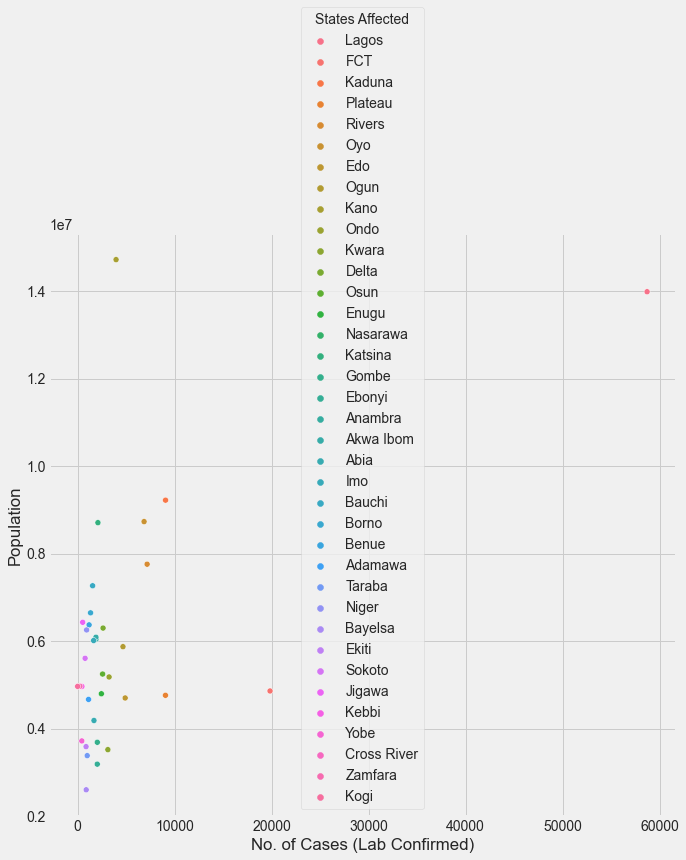

In [81]:
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x='No. of Cases (Lab Confirmed)',y='Population',hue='States Affected',data=data_combined)
plt.savefig('pop vs confirmed')

In [82]:
n_largest_data = data_combined.nlargest(10, 'No. of Cases (Lab Confirmed)')

In [83]:
n_largest_data.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths',
       'region', 'Population', 'Overall CCVI Index', 'Age', 'Epidemiological',
       'Fragility', 'Health System', 'Population Density', 'Socio-Economic',
       'Transport Availability', 'Acute IHR'],
      dtype='object')

In [84]:
n_largest_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58713,1284,56990,439,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19841,571,19104,166,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,9068,3,9000,65,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,9060,1,9002,57,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Rivers,7169,28,7040,101,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
5,Oyo,6855,2,6729,124,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,4907,7,4715,185,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,4680,3,4627,50,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,3967,8,3849,110,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Ondo,3248,1105,2080,63,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


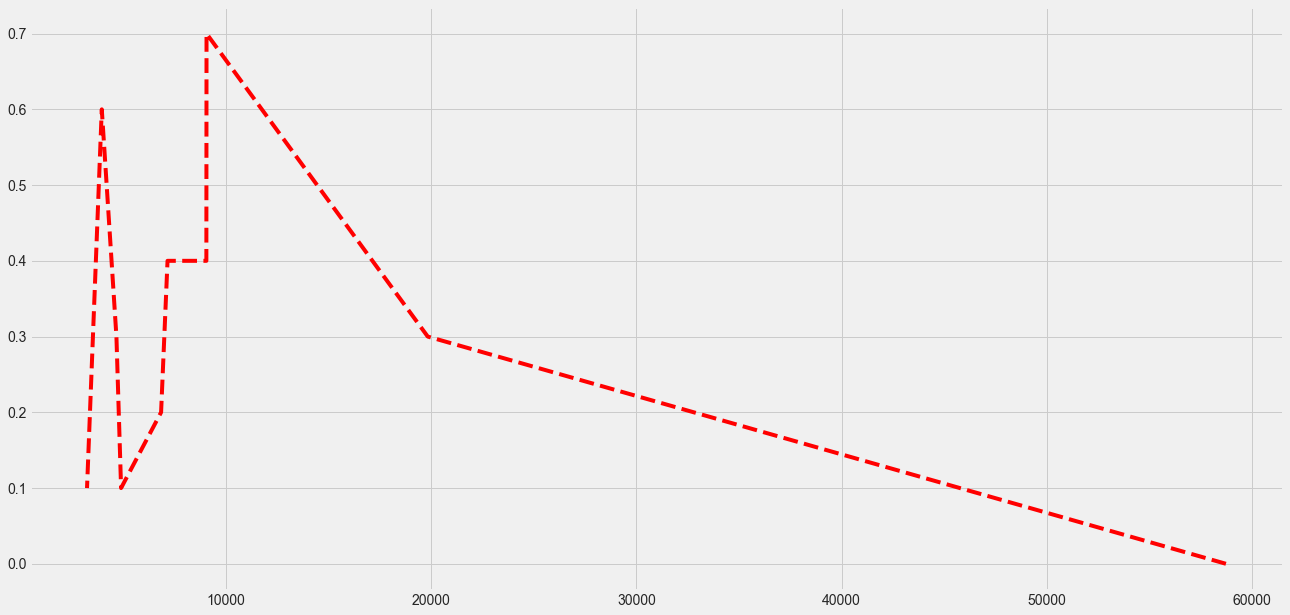

In [85]:
fig,ax=plt.subplots(figsize=(20,10))
plt.plot(n_largest_data['No. of Cases (Lab Confirmed)'],n_largest_data['Overall CCVI Index'],'r--')
plt.savefig('area of low')

#### Areas with  low CCVI have relatively high number of confirmed cases

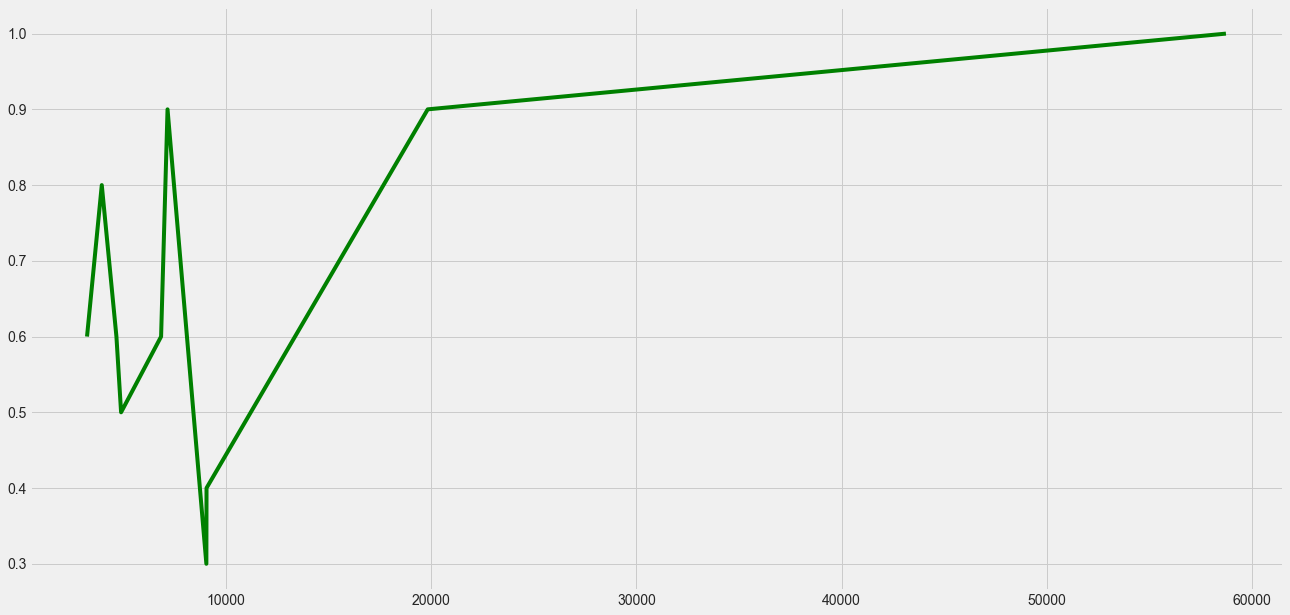

In [86]:
fig,ax=plt.subplots(figsize=(20,10))
plt.plot(n_largest_data['No. of Cases (Lab Confirmed)'],n_largest_data['Population Density'],'g')
plt.savefig('dense')

#### Densely populated area also contributed to the source capsule of high number of confirmed cases

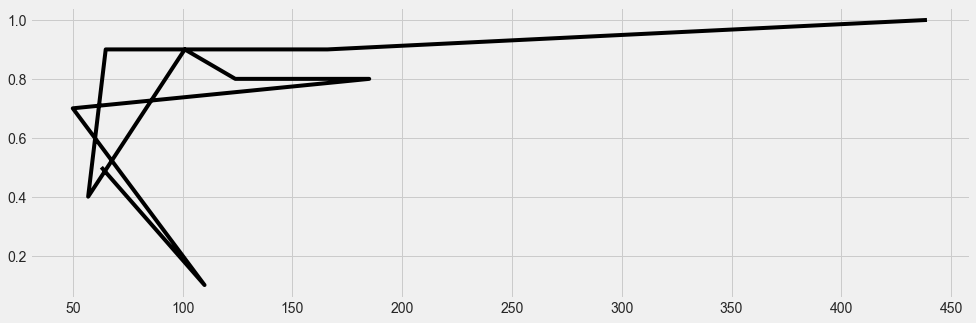

In [87]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(n_largest_data['No. of Deaths'],n_largest_data['Epidemiological'],'black')
plt.savefig('death vs epi')


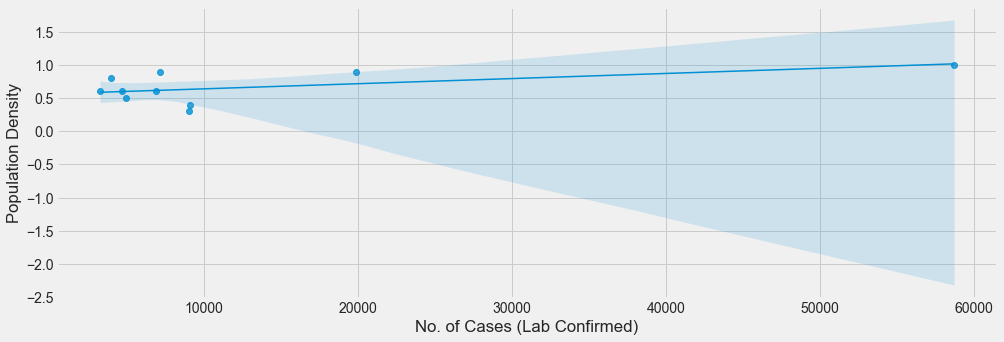

In [88]:
fig,ax=plt.subplots(figsize=(15,5))
p=sns.regplot(x='No. of Cases (Lab Confirmed)',y='Population Density',data=n_largest_data)
plt.setp(p.lines,linewidth=1.5) 
plt.show()


## QUARTERLY GDP DATA ANALYSIS

In [89]:
real_gdp_data

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [90]:
real_gdp_data[['Q1', 'Q2', 'Q3', 'Q4']].mean(axis=0)

Q1    1.607174e+07
Q2    1.635760e+07
Q3    1.788093e+07
Q4    1.600959e+07
dtype: float64

#### Average cummmulative gdp is highest at the third quarter

In [91]:
df = pd.DataFrame(real_gdp_data[['Q1', 'Q2', 'Q3', 'Q4']].mean(axis=0)).reset_index()

In [92]:
df['index'] = real_gdp_data['Year']

In [93]:
df.columns = ['Year', 'Total GDP']

In [94]:
df

,Year,Total GDP
0,2014,1.607174e+07
1,2015,1.635760e+07
2,2016,1.788093e+07
3,2017,1.600959e+07


#### The year with the highest total GDP was year 2016 and the lowest being 2017.

In [95]:
real_gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [96]:
real_gdp_data['Year'] = real_gdp_data['Year'].astype('object')

In [97]:
real_gdp_data.describe()

,Q1,Q2,Q3,Q4
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07


In [98]:
quarters=real_gdp_data.columns[1:]


In [99]:
quarters


Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

In [100]:
# using the .melt method
gdp = pd.melt(real_gdp_data,id_vars=['Year'],value_vars=quarters,var_name='Q1-Q4',value_name='GDP')


In [101]:
gdp

,Year,Q1-Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [102]:
qt1 = gdp[ : 7]

In [103]:
qt1

,Year,Q1-Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00


In [104]:
qt2 = gdp[7:14]

In [105]:
qt2

,Year,Q1-Q4,GDP
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41
10,2017,Q2,16334719.27
11,2018,Q2,16580508.07
12,2019,Q2,16931434.89
13,2020,Q2,15890000.00


In [106]:
qt3 = gdp[14:21]

In [107]:
qt3

,Year,Q1-Q4,GDP
14,2014,Q3,17479127.58
15,2015,Q3,17976234.59
16,2016,Q3,17555441.69
17,2017,Q3,17760228.17
18,2018,Q3,18081342.10
19,2019,Q3,18494114.17
20,2020,Q3,17820000.00


In [108]:
qt4 = gdp[21:]

In [109]:
qt4

,Year,Q1-Q4,GDP
21,2014,Q4,18150356.45
22,2015,Q4,18533752.07
23,2016,Q4,18213537.29
24,2017,Q4,18598067.07
25,2018,Q4,19041437.59
26,2019,Q4,19530000.00
27,2020,Q4,0.00


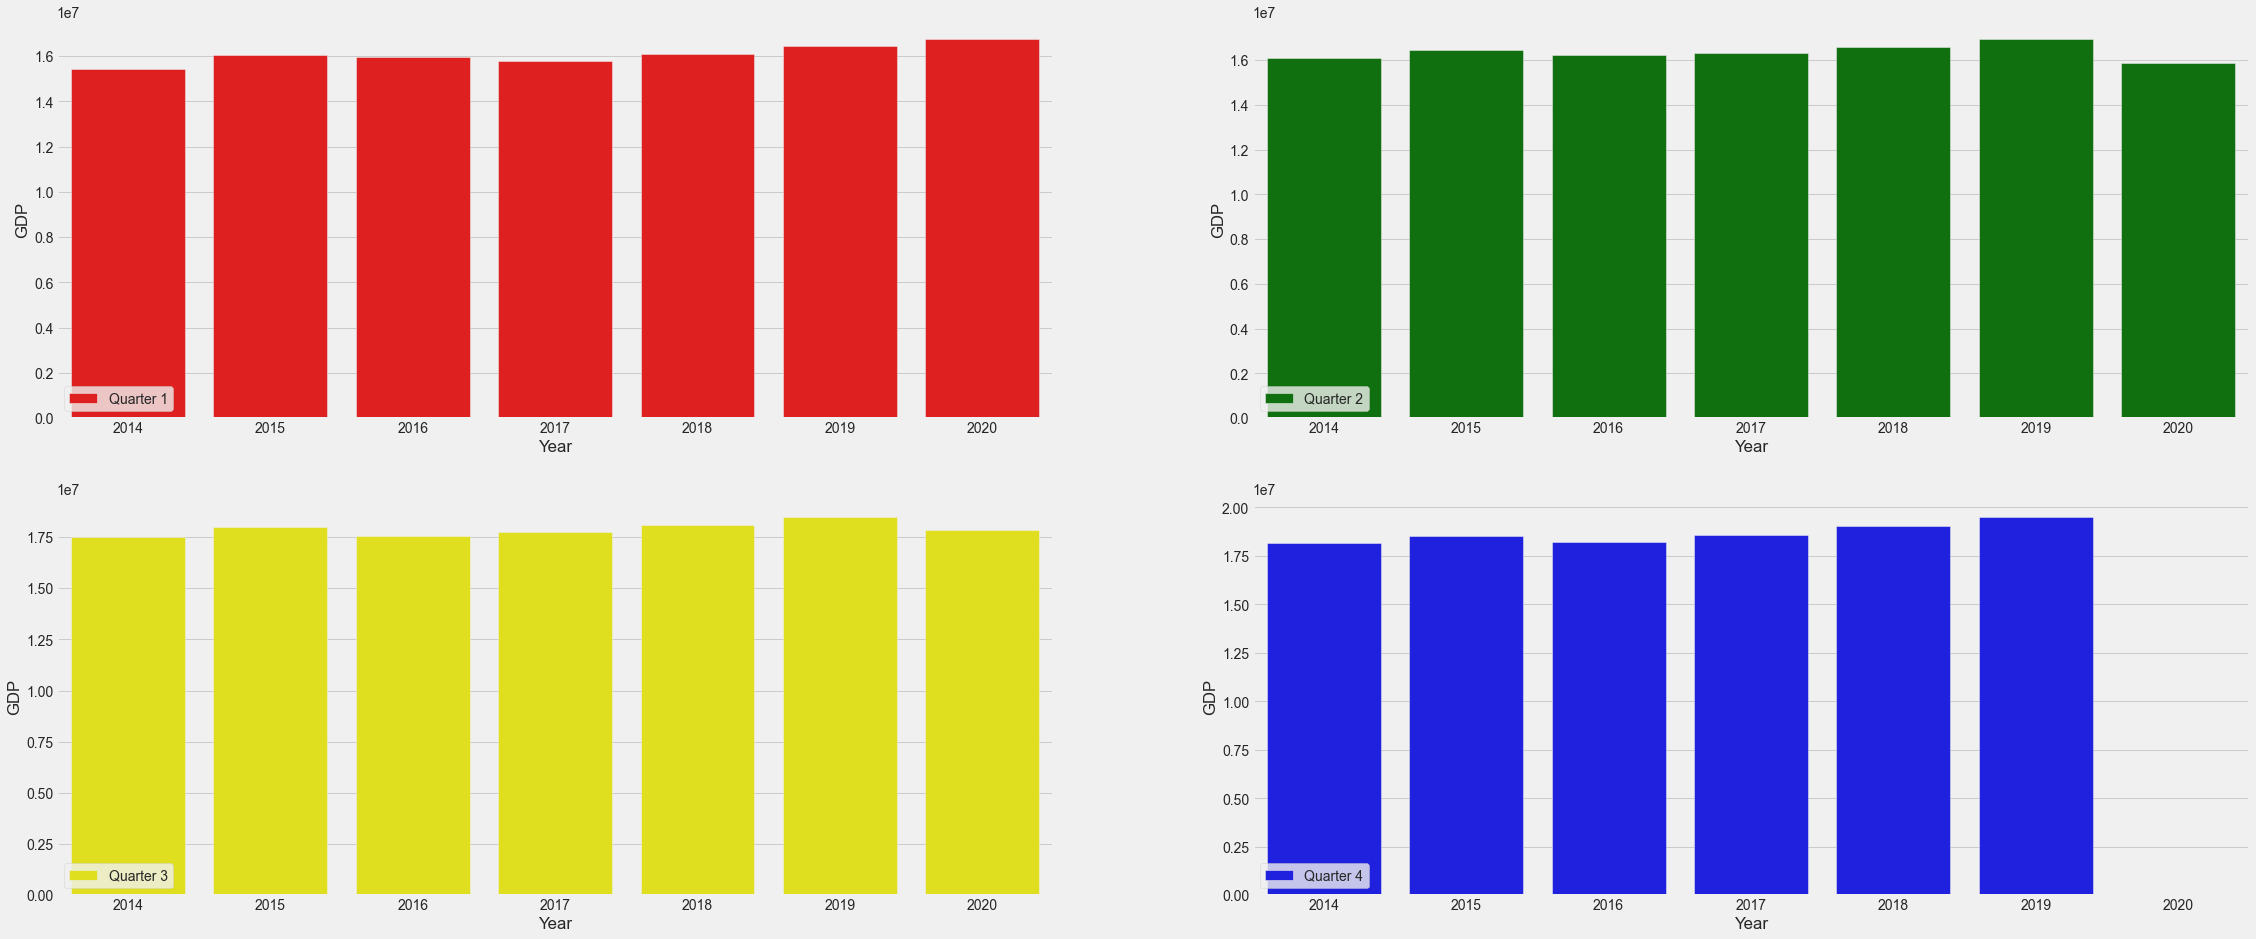

In [110]:
fig,ax=plt.subplots(figsize=(35,15))

plt.subplot(2,2,1)
sns.barplot(x='Year',y='GDP',data=qt1,color='red',label='Quarter 1')
plt.legend(loc=3)

plt.subplot(2,2,2)
sns.barplot(x='Year',y='GDP',data=qt2,color='green',label='Quarter 2')
plt.legend(loc=3)

plt.subplot(2,2,3)
sns.barplot(x='Year',y='GDP',data=qt3,color='yellow',label='Quarter 3')
plt.legend(loc=3)

plt.subplot(2,2,4)
sns.barplot(x='Year',y='GDP',data=qt4,color='blue',label='Quarter 4')
plt.legend(loc=3)
plt.savefig('quarter')


In [111]:
real_gdp_data[real_gdp_data['Year']==2020]['Q2']

6    15890000.0
Name: Q2, dtype: float64

## Covid-19 Nigeria Data Analysis

In [112]:
covid_ng_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [113]:
covid_ng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [114]:
def remove_comma(feature):
    covid_ng_data[feature]=covid_ng_data[feature].str.replace(',','').astype('int64')

In [115]:
remove_comma('No. of Cases (Lab Confirmed)')
remove_comma('No. of Cases (on admission)')
remove_comma('No. Discharged')

In [116]:
covid_ng_data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [117]:
covid_ng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [118]:
covid_ng_data.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37.000000,37.000000,37.000000,37.000000
mean,2119.837838,240.810811,1846.027027,33.000000
std,4537.417740,595.255773,4009.464785,41.797794
min,5.000000,0.000000,3.000000,2.000000
25%,381.000000,25.000000,300.000000,11.000000
50%,897.000000,57.000000,775.000000,21.000000
75%,1843.000000,183.000000,1737.000000,36.000000
max,26708.000000,2840.000000,24037.000000,236.000000


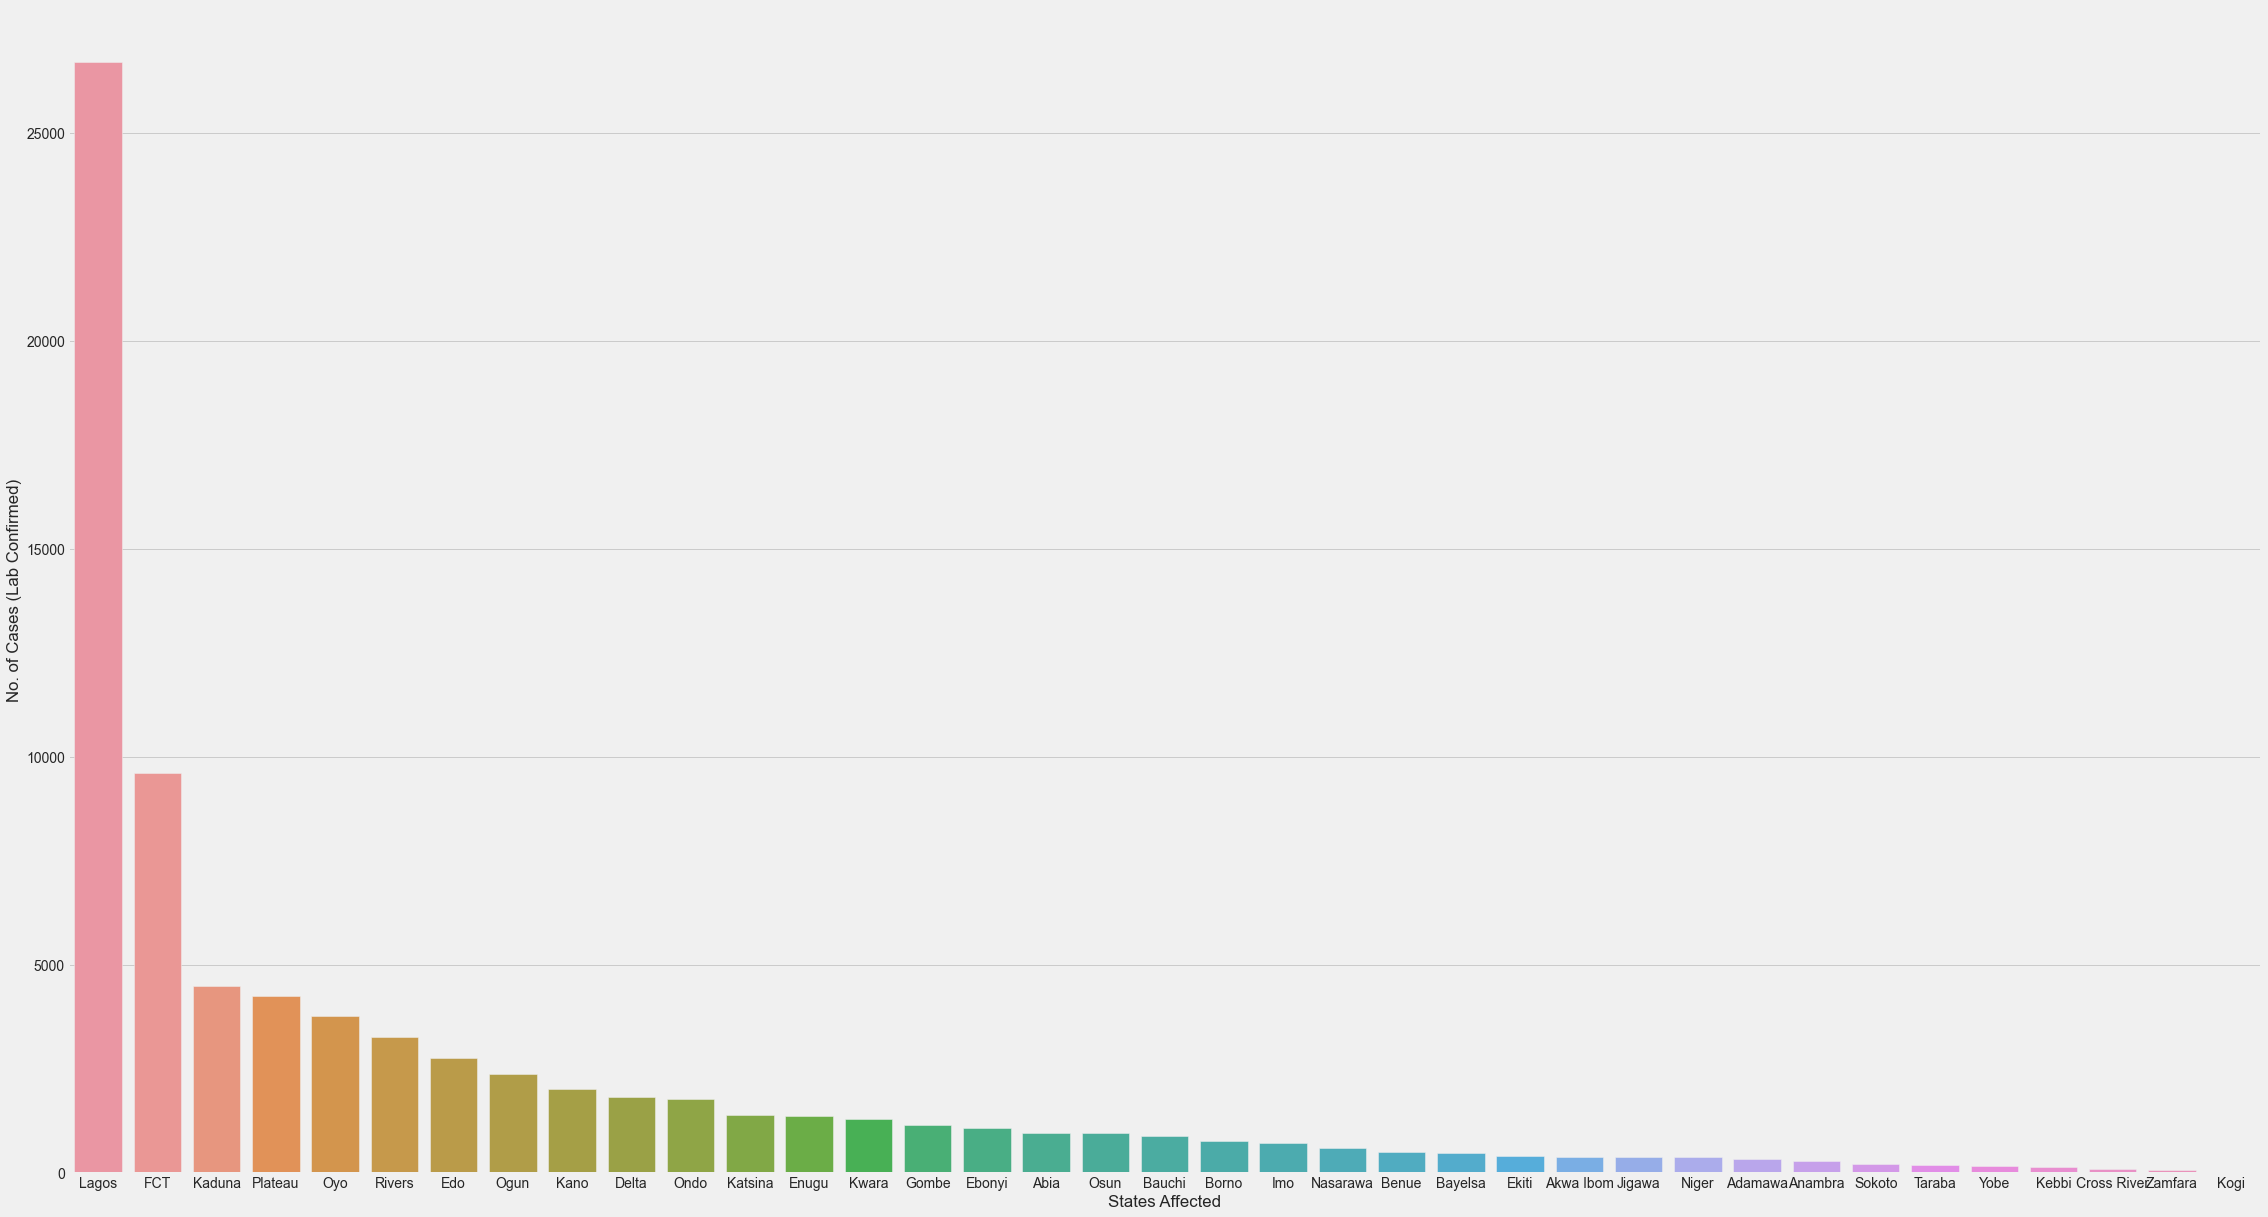

In [119]:
fig,ax=plt.subplots(figsize=(35,20))
sns.barplot(x='States Affected',y='No. of Cases (Lab Confirmed)',data=covid_ng_data)
plt.savefig('confirmed')


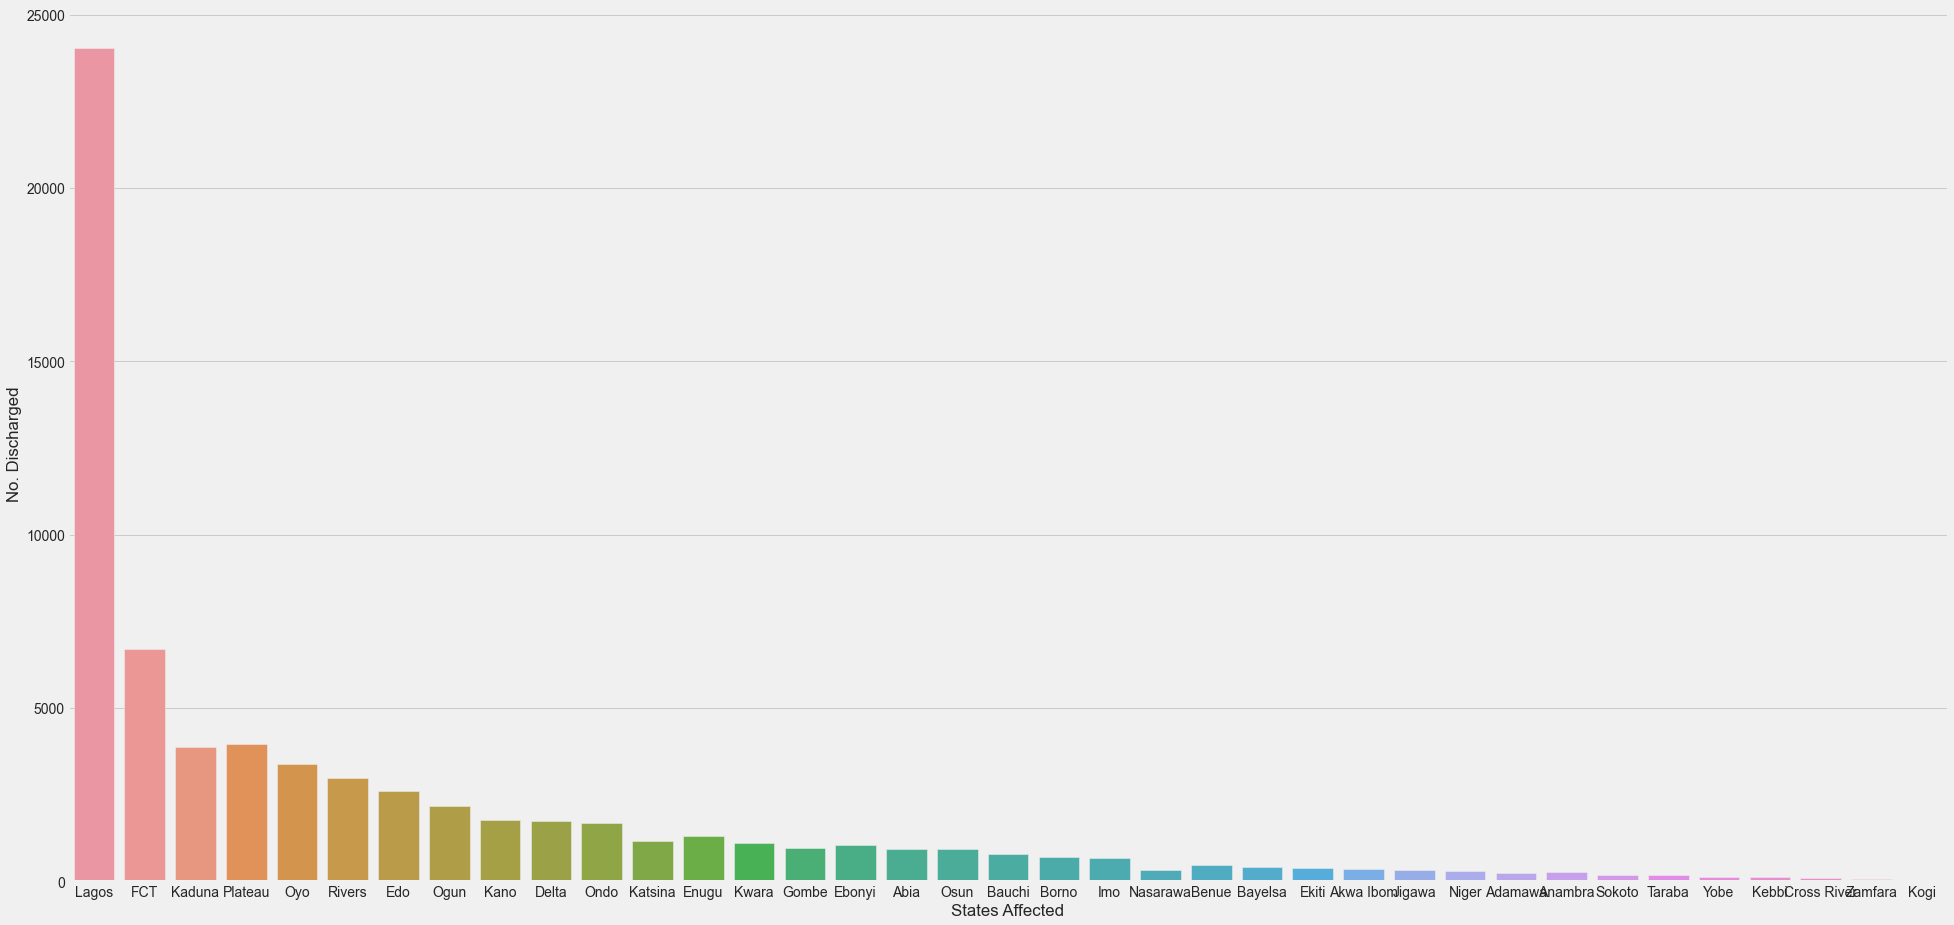

In [120]:
fig,ax=plt.subplots(figsize=(30,15))
sns.barplot(x='States Affected',y='No. Discharged',data=covid_ng_data)
plt.savefig('discharge')

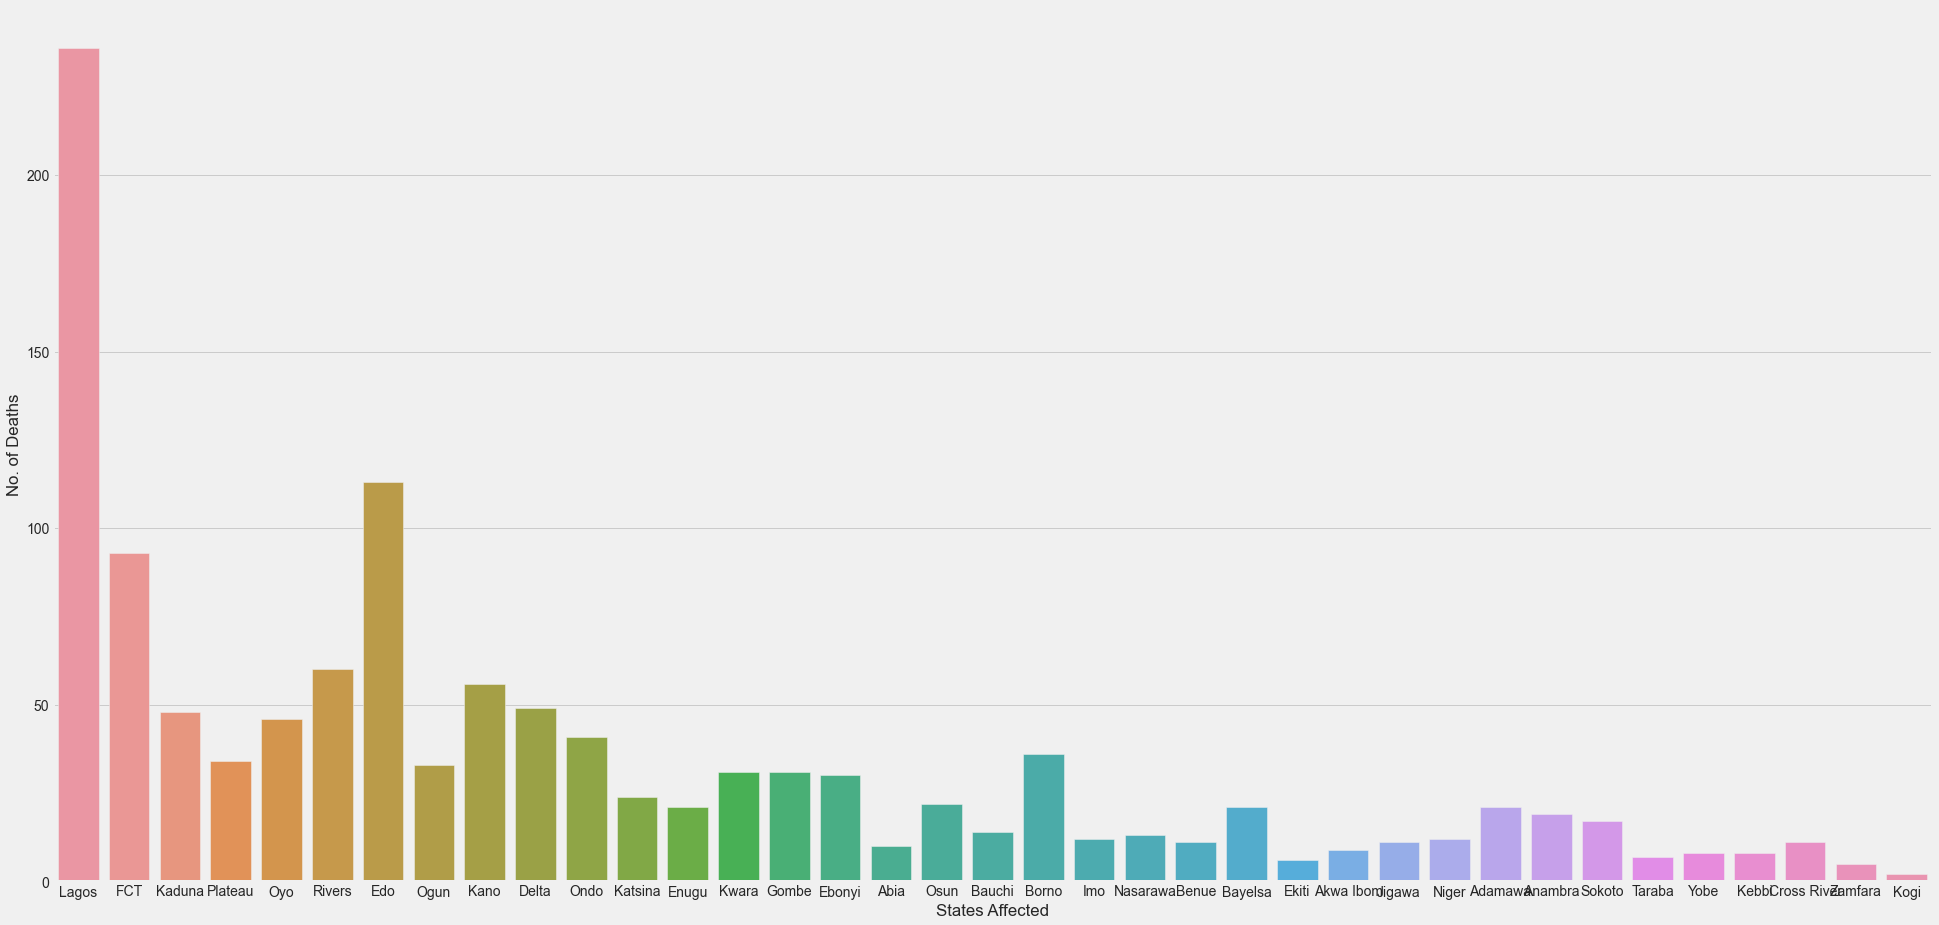

In [121]:
fig,ax=plt.subplots(figsize=(30,15))
sns.barplot(x='States Affected',y='No. of Deaths',data=covid_ng_data)
plt.savefig('death')

### Budget Data Analysis
States across the country reduced their initial budget due to the impact of COVID-19 on the economy.

The data is to be used to determine the impact of COVID-19 on the economy.

In [122]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [123]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [124]:
budget_data.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [125]:
budget_data.isnull().sum()

states                 0
Initial_budget (Bn)    0
Revised_budget (Bn)    0
dtype: int64

In [126]:
budget_data['Percentage Change In Budget(%)']=(budget_data['Initial_budget (Bn)']-budget_data['Revised_budget (Bn)'])/(budget_data['Initial_budget (Bn)'])

In [127]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,0.248170
1,Adamawa,183.30,139.31,0.239989
2,Akwa-Ibom,597.73,366.00,0.387683
3,Anambra,137.10,112.80,0.177243
4,Bauchi,167.20,128.00,0.234450
5,Bayelsa,242.18,183.15,0.243744
6,Benue,189.00,119.00,0.370370
7,Borno,146.80,108.80,0.258856
8,Cross River,1100.00,147.10,0.866273
9,Delta,395.50,282.30,0.286220


In [131]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   states                          37 non-null     object 
 1   Initial_budget (Bn)             37 non-null     float64
 2   Revised_budget (Bn)             37 non-null     float64
 3   Percentage Change In Budget(%)  37 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.3+ KB


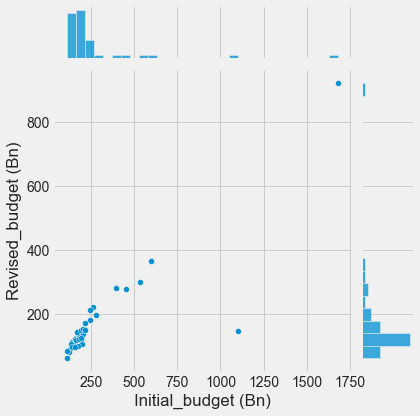

In [132]:
sns.jointplot(x='Initial_budget (Bn)',y='Revised_budget (Bn)',data=budget_data)

In [133]:
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,0.248170
1,Adamawa,183.30,139.31,0.239989
2,Akwa-Ibom,597.73,366.00,0.387683
3,Anambra,137.10,112.80,0.177243
4,Bauchi,167.20,128.00,0.234450


<AxesSubplot:xlabel='states', ylabel='Initial_budget (Bn)'>

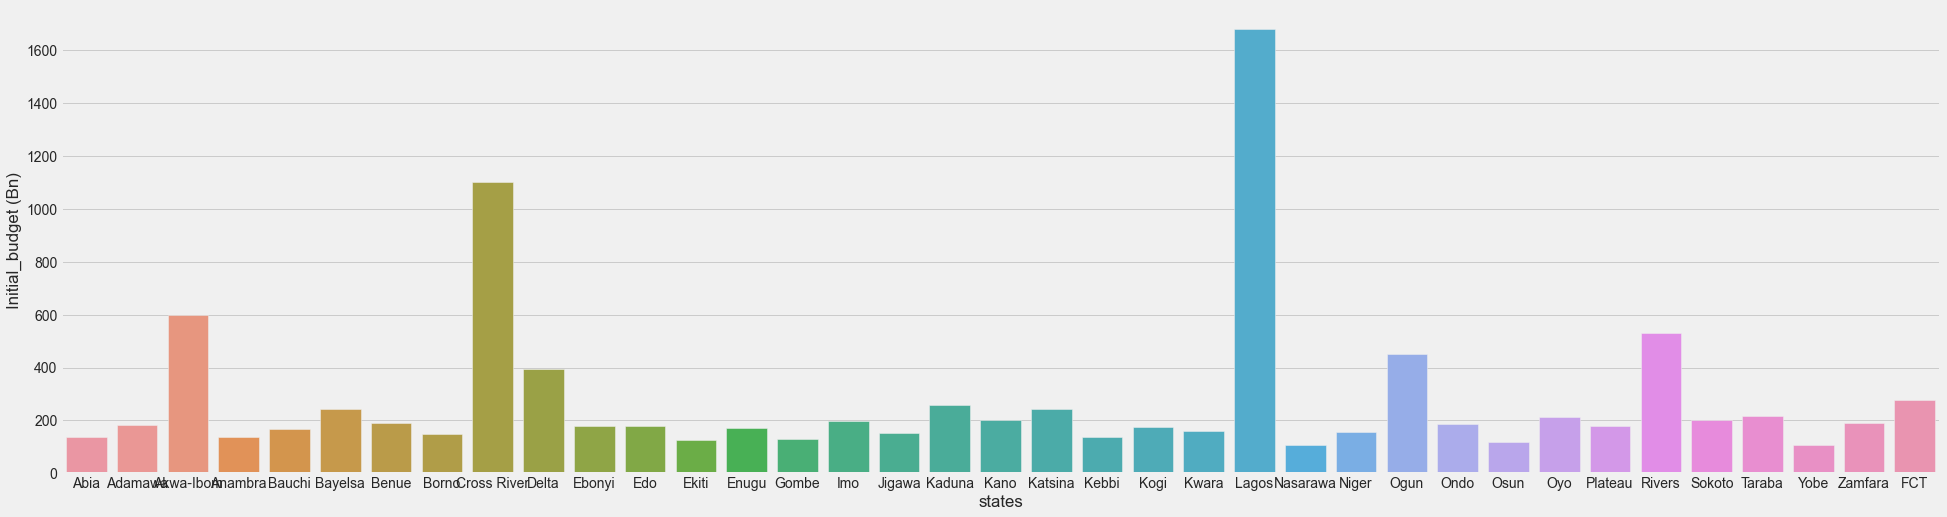

In [134]:
fig,ax=plt.subplots(figsize=(30,8))
sns.barplot(x='states',y='Initial_budget (Bn)',data=budget_data)

<AxesSubplot:xlabel='states', ylabel='Revised_budget (Bn)'>

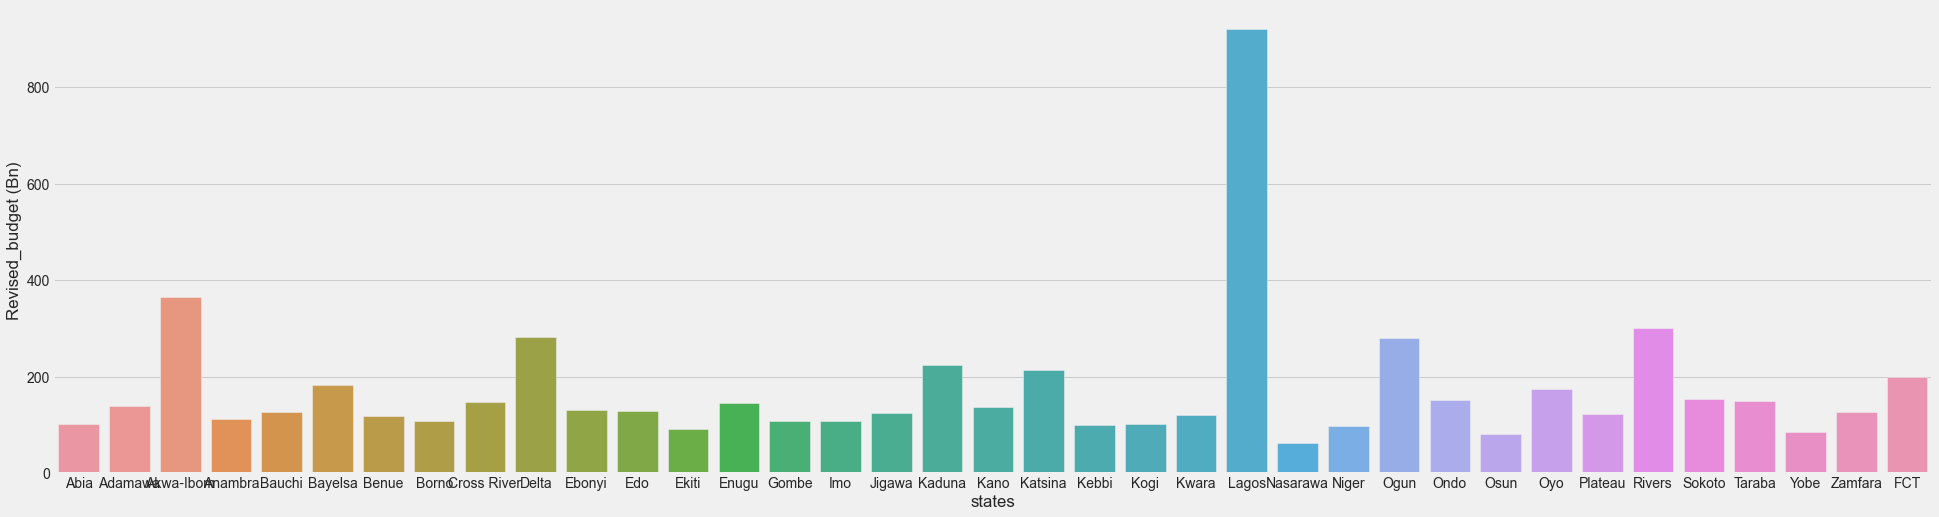

In [135]:
fig,ax=plt.subplots(figsize=(30,8))
sns.barplot(x='states',y='Revised_budget (Bn)',data=budget_data)


Lagos has the highest budget prior to the pandemic with 1.7trn and after the revised budget was released with 920bn

In [136]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,0.248170
1,Adamawa,183.30,139.31,0.239989
2,Akwa-Ibom,597.73,366.00,0.387683
3,Anambra,137.10,112.80,0.177243
4,Bauchi,167.20,128.00,0.234450
5,Bayelsa,242.18,183.15,0.243744
6,Benue,189.00,119.00,0.370370
7,Borno,146.80,108.80,0.258856
8,Cross River,1100.00,147.10,0.866273
9,Delta,395.50,282.30,0.286220


In [137]:
budget_data['Percentage Change In Budget(%)'].mean()

0.29769165627276895

In [138]:
budget_data[budget_data['Percentage Change In Budget(%)']==budget_data['Percentage Change In Budget(%)'].min()]

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
19,Katsina,244.0,213.0,0.127049


In [139]:
budget_data[budget_data['Percentage Change In Budget(%)']==budget_data['Percentage Change In Budget(%)'].max()]

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
8,Cross River,1100.0,147.1,0.866273


The analysis from the initial and revised budget data shows that the average percentage budget drop in Nigeria across all states is approximately 30%

katsina had the lowest percentage change of about 13% from 344Bn to 213Bn

Cross River had the highest percentage change of about 87% from 1.1trn to 147bn